#Исходные данные

проект в GitHub

https://github.com/terrainternship/Radlogics

**Управление файлами в Google Colab**

https://medium.com/nuances-of-programming/%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D1%84%D0%B0%D0%B9%D0%BB%D0%B0%D0%BC%D0%B8-%D0%B2-google-colab-8ea813ca20ab

форма для вопросов заказчику

https://docs.google.com/spreadsheets/d/1t8jnHupBSC5hmIn4Rbf7rmR4UbTL9xSGItKXPakkb0E/edit#gid=0

данные для датасета из медицинского репозитория

https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=68551327#685513270a399f0788834f03a790298161149ef6

документ по снимкам

https://radiologyupdate.org/f/2018/10/CT%20scan%20attenuation%20value%20measurement%20as%20a%20diag-%20nostic%20tool%20for%20patients%20with%20pleural%20e%20usions-2.pdf

ссылка на общую папку (на Гугле диске Андрея С.): https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76

ссылка на папку Archive с файлом Dataset.zip: https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l

ссылка на Dataset.zip: https://drive.google.com/file/d/1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG/view?usp=share_link


ID файла = 1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG

**библиотеки, программы для работы со снимками:**

MultiVox Dicom Viewer	программа для просмотра файлов DICOM

**nibabel** - библиотека для чтения и записи файлов изображений и данных медицинской области, таких как MRI и CT сканы. Она поддерживает множество форматов файлов, включая NIfTI, MINC, Analyze и DICOM.

Метод get_data позволяет сэкономить память и получать отдельные срезы (в отличие от get_fdata).

Он вроде как Deprecated, поэтому на время его пользования можно отключать предупреждения:

warnings.filterwarnings('ignore')

img_eff.get_data()[:, :, img_slice]

warnings.filterwarnings('default')

**pydicom** - пакет Python для обработки файлов формата DICOM, который может обрабатывать, включая медицинские изображения (КТ и т. Д.) и отчеты: https://pydicom.github.io/pydicom/stable/auto_examples/index.html

формат DICOM - https://dicom.nema.org/medical/dicom/current/output/chtml/part10/chapter_7.html


**полезная информация**

Формат **png**

Диапазон значений, используемый в пикселях для изображений в формате PNG, обычно составляет от 0 до 255. Это означает, что каждый пиксель может иметь значение яркости от полностью черного (0) до полностью белого (255), а также все промежуточные значения. Однако, в некоторых случаях могут использоваться другие диапазоны значений, например, для изображений с более высоким разрешением (16 бит на канал) может использоваться диапазон от 0 до 65535.

**Функция tifffile.TiffFile** 

предназначена для чтения файлов формата TIFF. Она возвращает объект TiffFile, который представляет собой последовательность страниц (изображений) в файле TIFF.

С помощью метода TiffFile.pages можно получить список страниц в файле. Каждая страница представлена объектом TiffPage, который содержит информацию о размере изображения, типе данных, количестве каналов и других параметрах.

Методы TiffPage.asarray и TiffPage.toarray позволяют преобразовать изображение в numpy массив. Метод TiffPage.save сохраняет страницу в новый файл.

Также объект TiffFile имеет атрибут tags, который содержит информацию о метаданных файла TIFF, таких как дата создания, автор, разрешение и другие параметры.

Функция tifffile.TiffFile поддерживает чтение файлов формата TIFF в различных кодировках и сжатиях, включая LZW, JPEG, PackBits и другие.

##**Ответы от заказчика**



Пиксели в дайкоме означают (условную) плотность ткани.

Формула для перевода значений пикселя в HU (Hounsfield Unit - единицы измерения этой радиоплотности) такова:

**HU = Pixel Value x Rescale Slope + Rescale Intercept** 

значения Rescale Slope и Rescale Intercept содержатся в соответствующих дайком тегах: (0028,1053) и (0028,1052)

В нашем случае значение Rescale Intercept будет, обычно, равно -1024 - его же и можно использовать как нейтральное значение HU, т.к. это то значение, которое, согласно формуле, получится при значении пикселя = 0.


Допустимые методы искажения снимков (dcm) для увеличения данных (ответ от заказчика):

- поворот
- отражение
- наклон
- шум
- искажения 

Эти варианты мы часто используем, и они могут оказаться полезными и для данной патологии.


In [ ]:
# Важные теги в файле dcm

# (0018, 0050) Slice Thickness                     DS: '5.0'
# (0018, 0088) Spacing Between Slices              DS: '5.0'
# (0020, 0013) Instance Number                     IS: '1'
# (0020, 0032) Image Position (Patient)            DS: [-158.135803, -179.035797, -75.699997]
# (0020, 1041) Slice Location                      DS: '-77.2040634155'
# (0028, 0002) Samples per Pixel                   US: 1
# (0028, 0010) Rows                                US: 128
# (0028, 0011) Columns                             US: 128
# (0028, 0030) Pixel Spacing                       DS: [0.661468, 0.661468]
# (0028, 0103) Pixel Representation                US: 1
# (0028, 0106) Smallest Image Pixel Value          US: 0
# (0028, 0107) Largest Image Pixel Value           US: 2535
# (0028, 0120) Pixel Padding Value                 SS: -2000
# (0028, 1052) Rescale Intercept                   DS: '-1024.0'
# (0028, 1053) Rescale Slope                       DS: '1.0'
# (7fe0, 0010) Pixel Data                          OW: Array of 524288 elements

Сортировка dcm-файлов:

лучше опираться на DICOM метаданные, а не на имя файла при сопоставлении. А именно на тег **Instance Number**

#Описание подхода

**Входные ограничения:**

- бесплатный гугл-диск (=15Г) - мало места для размещения исходных файлов (как минимум 24Г)

- бесплатная ОЗУ (=12Г) - мало для создания полных np-массивов из файлов в памяти

- невозможно скачать на локальный диск архив с dcm-файлами: ни с исходной ссылки, ни с расшаренной гугл-папки Андрея С.


**Следствия ограничений:**

т.к. в папке Колаба /content есть 72Г (107Г если без GPU), то:
 
 - закачиваем в Колаб "Dataset.zip" из папки Андрея С

 - закачиваем в Колаб архив с nii.gz-файлами из локальной папки

 - все распаковываем и проводим перезапись всех файлов dcm в папки train/test (по папкам class_effusion/class_noeffusion) в формате tiff-файлов (определение класса делаем для каждого dcm-разреза на основании наличия/отсутствия 1 в соответствующем сегментированном разрезе)

- полученные таким образом папки train/test архивируем и скачиваем на локальный диск

- в дальнейшем для построения датасетов используем архивы с train/test: загружаем с локального диска и распаковываем в Колабе

- на вход в модель для обучения подаем датасеты из папки train с помощью tf.keras.utils.image_dataset_from_directory; датасеты из папки test используем для оценки модели

- т.к. используем в качестве данных 2D массивы (срезы), то можем использовать 2D предобученную модель

**UPD (05.05.23)**: оказывается, первая группа уже распознавала те же самые данные как 2D изображения.. видимо, делала то же, что собиралась сделать я..т.е. подход отпадает.. надо все переделывать (??)..

**Новый подход:**

- при перезаписи файлов создаем 3D файлы в папках train/test (по классам есть/нет выпот в целом по пациенту)

- используем запись np-массива напрямую в файл (? или есть какой-то формат для 3D изображений?)

- используем свою 3D сеть

- подача в сеть из файлов через tf.keras.utils.image_dataset_from_directory


#Установка

In [ ]:
#@title проверка наличия, установка двух модулей для работы с nii.gz и dcm файлами

# нужные модули
needed_packages = ["nibabel", "pydicom"]

# проверяем список уже установленных модулей, выбираем из него нужные модули
import subprocess                                                      # для запуска команды

output = subprocess.check_output(['pip', 'freeze']).decode('utf-8')    # вывод от команды "!pip freeze" в виде байтов и декодирование в набор строк
packages = output.split(sep='\n')                                      # получаем список модулей

print("Список всех установленных сторонних модулей:")
print(packages)
print()

installed_packages = [pack.split("==")[0] for pack in packages if pack.split("==")[0] in needed_packages]
print("Список уже установленных необходимых модулей:")
print(installed_packages)
print()

# устанавливаем те модули из числа необходимых, которые еще не установлены
for pack in needed_packages:
  if pack not in installed_packages:
    print(f"Установка модуля: {pack}")
    !pip install $pack

Список всех установленных сторонних модулей:
['absl-py==1.4.0', 'alabaster==0.7.13', 'albumentations==1.2.1', 'altair==4.2.2', 'anyio==3.6.2', 'appdirs==1.4.4', 'argon2-cffi==21.3.0', 'argon2-cffi-bindings==21.2.0', 'array-record==0.2.0', 'arviz==0.15.1', 'astropy==5.2.2', 'astunparse==1.6.3', 'attrs==23.1.0', 'audioread==3.0.0', 'autograd==1.5', 'Babel==2.12.1', 'backcall==0.2.0', 'beautifulsoup4==4.11.2', 'bleach==6.0.0', 'blis==0.7.9', 'blosc2==2.0.0', 'bokeh==2.4.3', 'branca==0.6.0', 'build==0.10.0', 'CacheControl==0.12.11', 'cached-property==1.5.2', 'cachetools==5.3.0', 'catalogue==2.0.8', 'certifi==2022.12.7', 'cffi==1.15.1', 'chardet==4.0.0', 'charset-normalizer==2.0.12', 'chex==0.1.7', 'click==8.1.3', 'cloudpickle==2.2.1', 'cmake==3.25.2', 'cmdstanpy==1.1.0', 'colorcet==3.0.1', 'colorlover==0.3.0', 'community==1.0.0b1', 'confection==0.0.4', 'cons==0.4.5', 'contextlib2==0.6.0.post1', 'contourpy==1.0.7', 'convertdate==2.4.0', 'cryptography==40.0.2', 'cufflinks==0.17.3', 'cupy-cud

#Библиотеки

In [ ]:
# импорт библиотек

import gdown
from google.colab import files
import os
import zipfile                              # для работы с архивами
import glob                                 # позволяет получать список файлов, соответствующих заданному шаблону имени или расширению
import shutil                               # для работы с файлами, папками: копировать, перемещать, удалять файлы и папки, изменять их атрибуты.

# предоставляет возможность работать с байтами в памяти, как с файлом. 
# создает буфер в памяти, в который можно записывать или считывать байты, используя методы, аналогичные методам работы с файлами. 
import io  
#import resource                             # Увеличение объёма оперативной памяти Colab                     
import gc                                   # очистка ОЗУ    

#import requests                             # для взаимодействия с удаленными серверами

import nibabel as nib                       # для файлов nii.gz
import pydicom as dicom                     # для файлов dcm
from PIL import Image                       # для работы с изображениями
import tifffile                             # для работы с изображениями

import time                                 # для подсчета времени

In [ ]:
# импорт библиотек

import matplotlib.pyplot as plt              # импорт библиотеки matplotlib
%matplotlib inline
import numpy as np                           # импорт библиотеки numpy

import tensorflow as tf                      # Библиотека TensorFlow
# from tensorflow.keras import layers
# from tensorflow.keras import utils 

from keras.preprocessing.image import ImageDataGenerator          # для сборки датасета из файлов

from tensorflow.keras import optimizers as opt                    # оптимайзеры
from tensorflow.keras import losses as lss                        # функции потерь
from tensorflow.keras import metrics as mtr                       # метрики

#from sklearn.model_selection import train_test_split              # Для разделения выборки на тестовую и обучающую
from sklearn.utils import class_weight as sklucw                  # для подсчета весов классов

#from sklearn.preprocessing import StandardScaler                  # для нормализации числовых значений

In [ ]:
# для установки ограничений на ресурсы (лимиты на использование CPU, памяти, количества файловых дескрипторов, размера стека и тд)
# аргументы: тип ресурса (-> int); объект rlimit, который определяет лимит для ресурса (-> tuple())
# RLIMIT_DATA = максимальный размер памяти, которую процесс может использовать для хранения данных (например, переменных)
# resource.setrlimit(resource.RLIMIT_DATA, (2**30, 2**31-1))

# Примеры от ТГ-chatGPT3.5
# установка лимита на использование памяти в 1 Гб
# resource.setrlimit(resource.RLIMIT_AS, (1 * 1024 * 1024 * 1024, -1))
# отмена установленного лимита - !!!! не работает: ValueError: not allowed to raise maximum limit
# resource.setrlimit(resource.RLIMIT_DATA, (resource.RLIM_INFINITY, resource.RLIM_INFINITY))

In [ ]:
# подключение гугл-диска
from google.colab import drive 

DrivePath='drive'
drive.mount(os.path.join(os.getcwd(), DrivePath))

Mounted at /content/drive


#Константы

In [ ]:
# URL = "https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76"         # ссылка на общую папку Андрея С.
# FLD_ID = "1o1UtbUnM51in3f07s-XxB4Kmkq40v-76"                                             # id общей папки на гугл-диске Андрея С.
URL = "https://drive.google.com/drive/folders/1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l"         # ссылка на папку Archive с файлом dataset.zip
FLD_ID = "1wNvvFHiiUIqiVlkljdV7Xw28mvLddT9l"                                             # id общей папки на гугл-диске Андрея С.
FILE_ID = "1h-3t4p2Ve2doB_xutcvGqMI1cGYJU_NG"                                            # id файла Dataset.zip из общей папки

ORIGINAL_DIR = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics"  # папки с оригинальными изображениями (LUNG1-001, ...)
EFFUSIONS_DIR = "/content/Effusions"                                      # эффузия - сегментированные изображения выпотов
CAVITIES_DIR = "/content/Thoracic_Cavities"                               # полости - сегментированные изображения ??????

TRAIN_DIR = "/content/train"                                               # папка для записи срезов - обучающие файлы
TEST_DIR = "/content/test"                                                 # папка для записи срезов - тестовые файлы

CLASSES_NAME = ["class_noeffusions", "class_effusions"]                   # список классов

In [ ]:
# параметры датасетов

# размеры картинок
IMG_WIDTH = 512  
IMG_HEIGHT = 512  
IMG_DEPTH = 134          # меняется от 75 до 297 !!!!

TRAIN_TEST_RATIO = 0.2

EPS = 1e-8               # для предотвращения деления на 0

In [ ]:
# гиперпараметры обучения

BATCH_SIZE = 10 #60 #64
EPOCHS = 10

#Функции

In [ ]:
#@title Контекстный менеджер "timex" для измерения времени операций
# Операция обертывается менеджером с помощью оператора with
class timex:
  def __enter__(self):
    # Фиксация времени старта процесса
    self.t = time.time()
    return self

  def __exit__(self, type, value, traceback):
    # Вывод времени работы
    print('Время обработки: {:.2f} с'.format(time.time() - self.t))

In [ ]:
#@title "upload_and_extract" - для закачки архива и его распаковки с локального диска на диск Колаба 
# ---------------------------------------------------------------------------
def upload_and_extract(folder_name):
  print("Укажите файлы для загрузки:")

  uploaded = files.upload()                            # можно указать несколько файлов; возвращает словарь {имя файла: сам файл}
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
    print(f"Загружен файл:   {name}")
    if zipfile.is_zipfile(name):
      with zipfile.ZipFile(name, 'r') as zipped:
        zipped.extractall(os.path.join(os.getcwd(), folder_name))
      os.remove(name)
      print(f"Распакован файл: {name}")

In [ ]:
#@title "make_dirs" - создать папки из списка в указанной папке
# -----------------------------------------
def make_dirs(current_dir, new_dirs):
  '''
  current_dir - str: текущая папка, в которой надо создать другие папки
  new_dirs    - [str, ...]: список папок для создания
  '''
  try:
    print(f"В папке {current_dir} созданы директории:")
    for new_dir in new_dirs:
      #os.mkdir(os.path.join(current_dir, new_dir))           # создает одну папку в текущей папке
      os.makedirs(os.path.join(current_dir, new_dir))         # создает вложенные папки
      print(f"   {new_dir}")
  except Exception as ex:
    print(f"Ошибка при создании папки: {ex}")

In [ ]:
#@title "remove_dirs" - удалить папки (со всем содержимым) из списка в указанной папке
# --------------------------------------------------------------
def remove_dirs(current_dir, removing_dirs):
  '''
  current_dir   - str: текущая папка, в которой надо удалить другие папки
  removing_dirs - [str, ...]: список папок для удаления
  '''
  #FLD_TEMP = "/content/Dataset"
  #!rm -R $FLD_TEMP
  #shutil.rmtree('/path/to/folder')

  try:
    print(f"В папке {current_dir} удалены директории:")
    for removing_dir in removing_dirs:
      print(f"   {removing_dir}")
      #!rm -R $removing_dir
      shutil.rmtree(path=removing_dir, ignore_errors=True)
  except Exception as ex:
    print(f"Ошибка при удалении папки: {ex}")

In [ ]:
#@title функция для перемещения части файлов из папки train в папку test (не подходит!!)
# # не подходит, т.к. нужно разделить снимки по пациентам

# def files_split_train_test(data_dir, class_dir, target_dir, train_test_ratio):
#   '''
#   data_dir         - путь к папке train 
#   class_dir        - имя папки класса в папке train
#   target_dir       - имя целевой папки (test)
#   train_test_ratio - доля перемещаемых файлов
#   '''
#   # перемешивание списка имен файлов (без путей!!) в исходной папке 
#   files_name = sorted(os.listdir(os.path.join(data_dir, class_dir)))
#   idx_files_name = list(np.random.permutation(len(files_name)))

#   # перемещаем последние TRAIN_TEST_RATIO файлов из исходной папки в целевую
#   for i in idx_files_name[-int(len(idx_files_name) * train_test_ratio) : ]:
#     path_dst = data_dir.split(sep="/")
#     path_dst[-1] = target_dir
#     path_dst = "/".join(path_dst)
#     os.replace(os.path.join(data_dir, class_dir, files_name[i]), 
#                os.path.join(path_dst, class_dir, files_name[i]))

In [ ]:
#@title функция для записи части файлов из исходной папки в целевую папку (не используем !!!)
# !!! не используем, т.к. перемешиваем и разделяем на тест/трейн по пациентам
# def files_split_train_test(data_dir, class_dir, target_dir, train_test_ratio):
#   '''
#   data_dir         - путь к папке train 
#   class_dir        - имя папки класса в папке train
#   target_dir       - имя целевой папки (test)
#   train_test_ratio - доля перемещаемых файлов
#   '''
#   # перемешивание списка имен файлов (без путей!!) в исходной папке 
#   files_name = sorted(os.listdir(os.path.join(data_dir, class_dir)))
#   np.random.seed(28)
#   idx_files_name = list(np.random.permutation(len(files_name)))

#   # перемещаем последние TRAIN_TEST_RATIO файлов из исходной папки в целевую
#   for i in idx_files_name[-int(len(idx_files_name) * train_test_ratio) : ]:
#     path_dst = data_dir.split(sep="/")
#     path_dst[-1] = target_dir
#     path_dst = "/".join(path_dst)
#     os.replace(os.path.join(data_dir, class_dir, files_name[i]), 
#                os.path.join(path_dst, class_dir, files_name[i]))

In [ ]:
#@title "zip_dirs" - функция для архивирования папок
def zip_dirs(archive_path, folder_path):
  '''
  archive_path - путь к будущему архиву
  folder_path  - путь к папке, которую нужно заархивировать
  '''
  # # путь к будущему архиву и путь к папке, которую нужно заархивировать
  # archive_path = os.path.join(os.getcwd(),"test_dataset_tiff.zip")
  # folder_path = os.path.join(os.getcwd(),"test") 

  # создание архива и запись файлов в него
  with zipfile.ZipFile(archive_path, "w", zipfile.ZIP_DEFLATED) as zip_file:
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        #print(file_path)
        #zip_file.write(file_path)
        # в архив пишем без текущей папки (start=os.getcwd())
        zip_file.write(file_path, os.path.relpath(path=file_path, start=os.getcwd()))  #start=folder_path

In [ ]:
#@title "get_image" - функция чтения файла в зависимости от расширения (основа: Max (c))

# warnings.filterwarnings('ignore')
# img_eff.get_data()[:, :, img_slice]           # вроде как экономит память и можно брать сразу конкретный срез из файла
# warnings.filterwarnings('default')

def get_image(image_path, image_type="arr", dcm_process=True):
  '''
  image_path  - полный путь к файлу с изображением
  image_type  - что возвращаем: "obj" - считанное изображение; "arr" - np-массив из изображения; "all" - оба
  dcm_process - проводить для файлов dcm доп.обработку или нет (Pixel Value * Rescale Slope + Rescale Intercept)
  '''
  gc.collect()
  nslice = -1   # настоящий номер среза (актуально только для dcm-файла)
  # оригинальное изображение (75-297 файла на один снимок 152х152); np-массив содержит значения ([-???; ???], dtype=int16)
  if image_path.endswith(".dcm"): 
    image_obj = dicom.dcmread(image_path)
    image_np = image_obj.pixel_array.astype(np.int16)
    nslice = image_obj.InstanceNumber
    # сделаем доп.обработку значений элементов массива согласно статье
    if dcm_process:  
      image_np[image_np == -2000] = 0                       # Установите элемент за пределами границы на 0
      # intercept = image_obj.RescaleIntercept
      # slope = image_obj.RescaleSlope
      if image_obj.RescaleSlope != 1:
        image_np = image_obj.RescaleSlope * image_np.astype(np.float64)
        image_np = image_np.astype(np.int16)
      image_np += np.int16(image_obj.RescaleIntercept)      # = Pixel Value * Rescale Slope + Rescale Intercept

  # сегментированное изображение эффузии (один файл 152х152х(75-297)); np-массив содержит значения ({0, 1}, dtype=float64)
  if image_path.endswith("nii.gz"): 
    image_obj = nib.load(image_path)
    image_np = image_obj.get_fdata().astype(np.uint8)

  # пересохраненное в файле tiff содержимое PixelData из файла dcm
  if image_path.endswith("tiff"):
    #with tifffile.TiffFile(image_path) as tif:
    #  image_obj = tif.pages[0]
    image_obj = tifffile.TiffFile(image_path).pages[0]
    #image_np = image_obj.asarray().astype(np.int16)
    image_np = tifffile.imread(image_path).astype(np.int16)
    # Нормируем 0-1 (добавила, но наборы файлов с учетом этой нормировки не были сформированы)
    image_np=(image_np - image_np.min()) / (image_np.max() - image_np.min() + EPS) 
  
  if image_type == "arr": return None, image_np, nslice  
  if image_type == "obj": return image_obj, None, nslice 
  if image_type == "all": return image_obj, image_np, nslice 

In [ ]:
# пробуем как открыть файл tiff

# image_obj = tifffile.TiffFile("/content/train/class_noeffusions/LUNG1-006(1-001.dcm)001.tiff").pages[0]
# print(type(image_obj))

# image_np = image_obj.asarray().astype(np.int16)
# print(type(image_np), image_np.dtype, image_np.shape, image_np.min(), image_np.max())
# image_np = tifffile.imread("/content/train/class_noeffusions/LUNG1-006(1-001.dcm)001.tiff").astype(np.int16)
# print(type(image_np), image_np.dtype, image_np.shape, image_np.min(), image_np.max())

# with tifffile.TiffFile("/content/train/class_noeffusions/LUNG1-006(1-001.dcm)001.tiff") as tif:
#   image_obj = tif.pages[0]
# print(type(image_obj))

# image_np = image_obj.asarray().astype(np.int16)
# print(type(image_np), image_np.dtype, image_np.shape, image_np.min(), image_np.max())
# image_np = tifffile.imread("/content/train/class_noeffusions/LUNG1-006(1-001.dcm)001.tiff").astype(np.int16)
# print(type(image_np), image_np.dtype, image_np.shape, image_np.min(), image_np.max())

<class 'tifffile.tifffile.TiffPage'>
<class 'numpy.ndarray'> int16 (512, 512) -1024 2652
<class 'numpy.ndarray'> int16 (512, 512) -1024 2652


In [ ]:
#@title "make_slices_eff_mask" - функция формирования маски для срезов исходного изображения из файла сегментированного изображения

def make_slices_eff_mask(img_array):
  '''
  img_array - 3D np-массив сегментированного изображения, содержащий {0, 1}
  возвращаем булев массив, длиной по числу срезов в img_array (axis=2); True - если в срезе есть элементы сегментации выпота
  '''
  # первый уникальный срез в массиве np.unique весь из 0, индекс = 0; 
  # остальные срезы имеют ненулевые элементы (элементы сегментации выпота)
  _, idxs = np.unique(img_array, axis=2, return_inverse=True )  

  return np.bool8(idxs)

In [ ]:
#@title "save_patient_dcm2tiff" - функция пересохранения файлов dcm ПАЦИЕНТА в формате tiff по папкам-классам

# Сохранение NUMPY массива в формате TIFF:
# tifffile.imwrite('image.tiff', arr)
# Открытие tiff-файла в виде массива:
# arr = tifffile.imread('image.tiff').astype(np.int16)

# Сохранение NUMPY массива в виде файла:
# np.save("my_array.npy", my_array)
# Для загрузки сохраненного массива из файла:
# loaded_array = np.load("my_array.npy")

# Сохранение PixelData из файла dcm в бинарный файл
# ds = pydicom.dcmread('file.dcm')
# Сохранение в файл в бинарном формате
# with open('output.bin', 'wb') as f:
#   f.write(ds.PixelData)

def save_patient_dcm2tiff(patient_id, subset, effusion):
  '''
  patient_id       - str: код пациента (= имя папки пациента  LUNG1-xxx)
  subset           - str: название целевой папки (= "train", "test")
  effusion         - boolean: есть/нет выпот у пацента в целом
  '''

  gc.collect()

  # выходная папка набора (в зависимости от значения subset)
  data_dir = TRAIN_DIR if subset == "train" else TEST_DIR
  # путь к папке пациента (где есть его dcm-файлы)
  patient_path = os.path.join(ORIGINAL_DIR, patient_id) 

  # проверяем, что в исходных файлах есть такой пациент (если нет - завершаем работу функции)
  if not os.path.isdir(patient_path):
    print(f"{patient_id} - нет исходных данных в {ORIGINAL_DIR}") 
    return
  
  # список dcm-файлов пациента LUNG1-xxx (полные пути), которые будут найдены в подпапках в папке пациента
  patient_dcmfiles = sorted(glob.glob(f"{patient_path}{os.sep}**{os.sep}*.dcm", recursive=True))

  # создаем np-массив для сегментированного изображения nii.gz: все нули = нет выпотов
  segm_img_array = np.zeros(shape=(IMG_HEIGHT, IMG_WIDTH, len(patient_dcmfiles)), dtype=np.uint8)  
  # если есть папка пациента в Effusions, то переписываем np-массив на основе оригинального файла nii.gz
  #if os.path.isdir(os.path.join(EFFUSIONS_DIR, patient_id)):
  if effusion: # если признак effusion=True, то переписываем np-массив на основе сегментированного файла nii.gz
    # берем первый файл nii.gz с сегментированным изображением в папке patient_id (в виде np-массива)
    _, segm_img_array, _ = get_image(os.path.join(EFFUSIONS_DIR, patient_id, sorted(os.listdir(os.path.join(EFFUSIONS_DIR, patient_id)))[0]))
  # создаем маску индексов непустых срезов (срезов с наличием элементов сегментации)
  segm_img_mask = make_slices_eff_mask(segm_img_array)

  # print("путь к файлам dcm:", patient_path)
  # print("проверка флагов срезов картинки nii.gz:", segm_img_mask.shape)
  # for i in range(segm_img_array.shape[-1]):
  #   print("срез №:", i, "флаг выпота:", segm_img_mask[i], "min-max в срезе:", segm_img_array[:, :, i].min(), segm_img_array[:, :, i].max())
  #   plt.imshow(segm_img_array[:, :, i], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
  #   plt.axis("off")
  #   plt.title(f"сегментированный срез {i} из первого файла nii.gz") # , fontweight='bold')
  #   plt.show() 
  # if True: return
  
  count = 0
  # цикл по dcm-файлам пациента LUNG1-xxx (fname = полный путь к файлу)
  for i, fname in enumerate(patient_dcmfiles):
    gc.collect()

    # загружаем PixelData из dcm в np-массив (dtype=int16): None, np-массив, реальный номер среза (в нумерации с 1)
    img_obj, img_array, nslice = get_image(fname) 

    # выходная папка класса (в зависимости от есть/нет выпот на срезе)
    class_path = os.path.join(data_dir, CLASSES_NAME[1]) if segm_img_mask[nslice - 1] else os.path.join(data_dir, CLASSES_NAME[0])
    # формируем имя выходного файла: LUNG1-002-001(1-001.dcm).tiff
    img_fname = f"{patient_id}-{nslice:03d}({fname.split(sep=os.sep)[-1]}).tiff"

    #print(patient_id, "np-массив:", i, img_array.min(), img_array.max())

    # # создаем PIL изображение из массива          --- использовали этот кусок для файлов png
    # img = Image.fromarray(img_array)              ---
    # # сохраняем в папке соответствующего класса   ---
    # img.save(os.path.join(class_path, img_fname)) ---

    # пишем массив в файл в формате tiff
    tifffile.imwrite(os.path.join(class_path, img_fname), img_array)

    # удаляем исходный dcm-файл !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #os.remove(fname)
    count = i + 1
  print(f"{patient_id} всего срезов: {count}; записаны файлы tiff в папку {subset}")  

In [ ]:
#@title "save_patients" - функция записи срезов по списку пациентов

def save_patients(patients, subset, effusion):
  '''
  patients - [str, str,...]: список пациентов, чьи dcm-файлы нужно записать в формате tiff
  subset   - str: название целевой папки (= "train", "test")
  effusion - boolean: есть/нет выпот у пациента в целом
  '''
  # цикл по списку ПАЦИЕНТОВ (папкам LUNG1-xxx оригинальных снимков)
  print("Всего пациентов в списке:", len(patients))
  print()
  for i, patient_id in enumerate(patients): 
    gc.collect()
    # если patient_id - НЕ папка, пропускаем
    if not os.path.isdir(os.path.join(ORIGINAL_DIR, patient_id)):
      continue
    # переписываем dcm-файлы текущего пациента в формат tiff 
    print(f"Пациент {i + 1:3d}: ", end="")
    save_patient_dcm2tiff(patient_id, subset, effusion)
    #break

In [ ]:
#@title "show_image" - функция вывода изображения и его реквизитов (изначальных и после перевода в np-массив)

def show_image(filename, nslice, plt_title): #, n, ):
  '''
  filename  - str: имя файла (полный путь)
  nslice    - int: номер среза (в нумерации от 0); соответствующий номер dcm-файла = nslice + 1
  plt_title - str: заголовок для изображения
  '''
  # n         - (int, int, int): порядковый номер картинки на графике
  # 

  img, img_array, _ = get_image(filename, "all")
  # печатаем полезные данные об изображении
  print("Параметры изображения из файла:", filename.split(sep="/")[0])
  print("  тип", type(img))
  print("Параметры np-массива из изображения:")
  print("  тип элементов      ", type(img_array), img_array.dtype)
  print("  размеры            ", img_array.shape)
  print("  объем памяти       ", img_array.__sizeof__(), "b;") #, int(img_array.__sizeof__() / 1000000), "Mb")
  print("  min-max значения   ", img_array.min(), img_array.max())
  print("  уникальные значения", np.unique(img_array))
  # выводим изображение

  img_array_slice = img_array[:, :, nslice] if img_array.ndim == 3 else img_array

  #plt.subplot(*n)
  plt.imshow(img_array_slice, cmap=plt.cm.bone)   # cmap=plt.cm.gray 
  plt.title(plt_title)
  plt.axis("off")
  plt.show() 

In [ ]:
#@title функция вывода графиков обучения
# -----------------------------------------
def plot_show(param_list):
  #param_list = ["categorical_accuracy", "loss"]
  axis_titles = ["График точности", "График ошибок"]
  label_list = ["Доля верных ответов", "Ошибка"]
  plt.figure(figsize=(15,5))
  for i in range(2):
      plt.subplot(1,2, i+1)
      plt.title(axis_titles[i])
      plt.plot(history.history[param_list[i]], label=label_list[i] + ' на обучающем наборе')
      plt.plot(history.history['val_' + param_list[i]], label=label_list[i] + ' на проверочном наборе')
      plt.xlabel('Эпоха обучения')
      plt.ylabel(label_list[i])
      plt.legend()
      plt.grid(which = 'major', color = 'black', alpha = 0.3)
      plt.minorticks_on()
      plt.grid(which = 'minor', color = 'gray', alpha = 0.3, linestyle = '--')
  plt.show()

In [ ]:
#уменьшение размера dcm
'''
import pydicom
from pydicom.data import get_testdata_file

print(__doc__)

# FIXME: add a full-sized MR image in the testing data
filename = get_testdata_file('MR_small.dcm')
ds = pydicom.dcmread(filename)

# get the pixel information into a numpy array
data = ds.pixel_array
print('The image has {} x {} voxels'.format(data.shape[0],
                                            data.shape[1]))
data_downsampling = data[::8, ::8]
print('The downsampled image has {} x {} voxels'.format(
    data_downsampling.shape[0], data_downsampling.shape[1]))

# copy the data back to the original data set
ds.PixelData = data_downsampling.tobytes()
# update the information regarding the shape of the data array
ds.Rows, ds.Columns = data_downsampling.shape

# print the image information given in the dataset
print('The information of the data set after downsampling: \n')
print(ds)
'''

In [ ]:
#@title ненужные функции

# функция для формирования списка срезов исходного снимка и списка соответствующих имен файлов
# срезы отобраны и отсортированы по SliceLocation (на основе примера из документации)

# по итогам проверки: скорее всего, нет необходимости сортировать срезы dcm по SliceLocation
# считаем, что номера dcm-файлов соответствуют номерам срезов в файле nii.gz и во всех dcm-файлах есть SliceLocation
# без проверки на SliceLocation и сортировки эта функция не нужна

# !!!!! алгоритм не корректный в плане сопоставления флагов выпота файлам dcm....
# нужно сначала сортировать dcm по SliceLocation, потом сопоставлять срезы из nii.gz по индексам списка

# !!!!! не используем
# def make_slices_list_sortSL(patient_path, segm_img_mask):
#   '''
#   patient_path - str: путь к папке пациента
#   segm_img_mask - np-массив булевых значений по числу срезов
#   возвращает
#      список отсортированных по SliceLocation срезов (файлов-dcm) - list: [dcm1, dcm2, ...]
#      список имен соответствующих dcm-файлов - list: [str1, str2, ...]
#   '''
#   # список для загрузки dcm-файлов, список для имен файлов
#   dcm_files = [] 
#   dcm_fnames = []
#   gc.collect()

#   # цикл по именам файлов (полный путь), которые будут найдены в подпапках в папке пациента
#   for i, fname in enumerate(sorted(glob.glob(f"{patient_path}/**/*.dcm", recursive=True))):
#     dcm_files.append(get_img(fname, "obj"))                                     # добавляем dcm-файл в общий список
#     dcm_fnames.append((fname, segm_img_mask[i]))                                # добавляем в список (путь к dcm-файлу, флаг класса)
#   print(f"Пациент: {patient_path.split(sep='/')[-1]} всего срезов: {len(dcm_files)}")

#   # пропускаем файлы, где нет SliceLocation (skip files with no SliceLocation (eg scout views))
#   dcm_slices = []
#   dcm_snames = []
#   skipcount = 0
#   for i, file in enumerate(dcm_files):
#     if hasattr(file, 'SliceLocation'):
#       dcm_slices.append(file)                                                   # добавляем dcm-файл в выходной список
#       #dcm_fnames[i] = dcm_fnames[i] + tuple(file.SliceLocation)                 # добавляем к пути dcm-файла значение SliceLocation
#       dcm_snames.append(dcm_fnames[i] + (file.SliceLocation,))                  # добавляем путь+флаг+SliceLocation в выходной список
#     else:
#       skipcount += 1
#   print(f"  из них пропущено (нет SliceLocation): {skipcount}")
  
#   # сортируем dcm-срезы в порядке SliceLocation (ensure they are in the correct order)
#   dcm_slices = sorted(dcm_slices, key=lambda s: s.SliceLocation)
#   # сортируем имена dcm-файлов в порядке SliceLocation: элемент dcm_slices_names = (пути dcm-файла, флаг класса, значение SliceLocation)
#   dcm_snames = sorted(dcm_snames, key=lambda s: s[-1])

#   gc.collect()

#   return dcm_slices, dcm_snames


# -------------------------------------------------------------------
# функция пересохранения файлов dcm в формате png по папкам-классам
# вариант с использованием функции "make_slices_list_sortSL" (с проверкой и сортировкой dcm-файлов по SliceLocation)

# def save_dcm2png_var1(original_dir=ORIGINAL_DIR, 
#                       effusions_dir=EFFUSIONS_DIR, 
#                       data_dir=DATA_DIR, 
#                       class_0="class_noeffusions", class_1="class_effusions"):
#   '''
#   original_dir - путь к папке пациентами (файлы dcm)
#   effusions_dir - путь к папке с сегментированными изображениями (файлы nii.gz)
#   data_dir - путь к папке для классов (файлы png)
#   class_0, class_1 - названия папок для класса без выпотов, класса с выпотами
#   '''
#   # цикл по ПАЦИЕНТАМ (папкам LUNG1-xxx оригинальных снимков)
#   for patient_id in sorted(os.listdir(original_dir)):      
#     gc.collect()
#     # путь к папке пациента
#     patient_path = os.path.join(original_dir, patient_id)           

#     # если patient_id - НЕ папка
#     if not os.path.isdir(patient_path):
#       continue

#     # берем первый(!!) файл с сегментированным изображением в папке patient_id, получаем np-массив
#     segm_img_array = get_img(os.path.join(effusions_dir, patient_id, sorted(os.listdir(os.path.join(effusions_dir, patient_id)))[0]))
#     # создаем маску индексов непустых срезов (срезов с наличием элементов сегментации)
#     segm_img_mask = make_slices_eff_mask(segm_img_array)

#     # получаем список срезов пациента (dcm-файлов) и список имен файлов с флагами класса
#     dcm_files, dcm_fnames = make_slices_list_sortSL(patient_path, segm_img_mask)

#     # цикл по СРЕЗАМ (списку dcm-файлов пациента)
#     for i, dcm_file in enumerate(dcm_files):
#       gc.collect()
#       # выходная папка, если нет флага выпота для среза
#       class_path = os.path.join(data_dir, class_0)
#       # формируем имя выходного файла: LUNG1-002(1-003.dcm)001.png
#       img_fname = f"{patient_id}({dcm_fnames[i][0].split(sep='/')[-1]}){i:03d}.png"
#       # переводим dcm PixelData в np-массив (dtype=int16)
#       img_array = dcm_file.pixel_array
#       # создаем PIL изображение из массива
#       img = Image.fromarray(img_array)
#       # переопределяем выходную папку, если есть флаг выпота для среза
#       if dcm_fnames[i][1]:
#         class_path = os.path.join(data_dir, class_1)
#       # сохраняем в папке соответствующего класса
#       img.save(os.path.join(class_path, img_fname))
#       # удаляем исходный dcm-файл
#       os.remove(dcm_fnames[i][0])
#     print(f"Записаны файлы png для пациента {patient_id}")
#     break

#Структура сети U-net3D

**UNET-3D** является трехмерным вариантом архитектуры UNet, разработанный для обработки трехмерных изображений и используется в задачах сегментации. Архитектура UNet была впервые представлена для сегментации двумерных изображений, и она имеет U-образную структуру, состоящую из энкодера (сжимающего путь) и декодера (разжимающего путь) с пропускными соединениями между ними.

Энкодер состоит из сверточных блоков, сопровождаемых операциями пулинга для снижения пространственных размеров. Декодер использует транспонированные сверточные слои для восстановления пространственных размеров искомого изображения. Пропускные соединения позволяют передавать информацию из энкодера в декодер, сохраняя детали изображения.

In [ ]:
#@title выходной размер НЕ совпадает с входным

def conv3d_block(input_tensor, num_filters):
    x = layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    return x

def encoder_block(input_tensor, num_filters):
    x = conv3d_block(input_tensor, num_filters)
    x = layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(x)
    return x

def decoder_block(input_tensor, skip_tensor, num_filters):
    x = layers.Conv3DTranspose(filters=num_filters, kernel_size=(2, 2, 2), strides=(2, 2, 2), padding="same")(input_tensor)
    x = layers.concatenate([x, skip_tensor], axis=-1)
    x = conv3d_block(x, num_filters)
    return x

def unet_3d(input_shape, num_classes):
    inputs = tf.keras.Input(input_shape)

    # Encoder
    e1 = encoder_block(inputs, 64)
    e2 = encoder_block(e1, 128)
    e3 = encoder_block(e2, 256)
    e4 = encoder_block(e3, 512)

    # Bridge
    b1 = conv3d_block(e4, 1024)

    # Decoder
    d1 = decoder_block(b1, e3, 512)
    d2 = decoder_block(d1, e2, 256)
    d3 = decoder_block(d2, e1, 128)

    # Output
    outputs = layers.Conv3D(filters=num_classes, kernel_size=1, activation="sigmoid", padding="same")(d3)

    model = tf.keras.Model(inputs, outputs)
    return model

# Пример использования модели
input_shape = (128, 128, 128, 1)
num_classes = 1

model = unet_3d(input_shape, num_classes)
model.summary()

In [ ]:
#@title выходной размер совпадает с входным
def conv3d_block(input_tensor, num_filters):
    x = layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv3D(filters=num_filters, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    return x

def encoder_block(input_tensor, num_filters):
    enc_out = conv3d_block(input_tensor, num_filters)
    x = layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2))(enc_out)
    return enc_out, x

def decoder_block(input_tensor, skip_tensor, num_filters):
    x = layers.Conv3DTranspose(filters=num_filters, kernel_size=(2, 2, 2), strides=(2, 2, 2), padding="same")(input_tensor)
    x = layers.concatenate([x, skip_tensor], axis=-1)
    x = conv3d_block(x, num_filters)
    return x

def unet_3d(input_shape, num_classes):
    inputs = tf.keras.Input(input_shape)

    # Encoder
    enc_out1, e1 = encoder_block(inputs, 64)
    enc_out2, e2 = encoder_block(e1, 128)
    enc_out3, e3 = encoder_block(e2, 256)
    enc_out4, e4 = encoder_block(e3, 512)

    # Bridge
    b1 = conv3d_block(e4, 1024)

    # Decoder
    d1 = decoder_block(b1, enc_out4, 512)
    d2 = decoder_block(d1, enc_out3, 256)
    d3 = decoder_block(d2, enc_out2, 128)
    d4 = decoder_block(d3, enc_out1, 64)

    # Output
    outputs = layers.Conv3D(filters=num_classes, kernel_size=1, activation="sigmoid", padding="same")(d4)

    model = tf.keras.Model(inputs, outputs)
    return model

# Пример использования модели
input_shape = (128, 128, 128, 1)
num_classes = 1

model = unet_3d(input_shape, num_classes)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 1)]                                                           
                                                                                                  
 conv3d_48 (Conv3D)             (None, 128, 128, 12  1792        ['input_4[0][0]']                
                                8, 64)                                                            
                                                                                                  
 batch_normalization_46 (BatchN  (None, 128, 128, 12  256        ['conv3d_48[0][0]']              
 ormalization)                  8, 64)                                                      

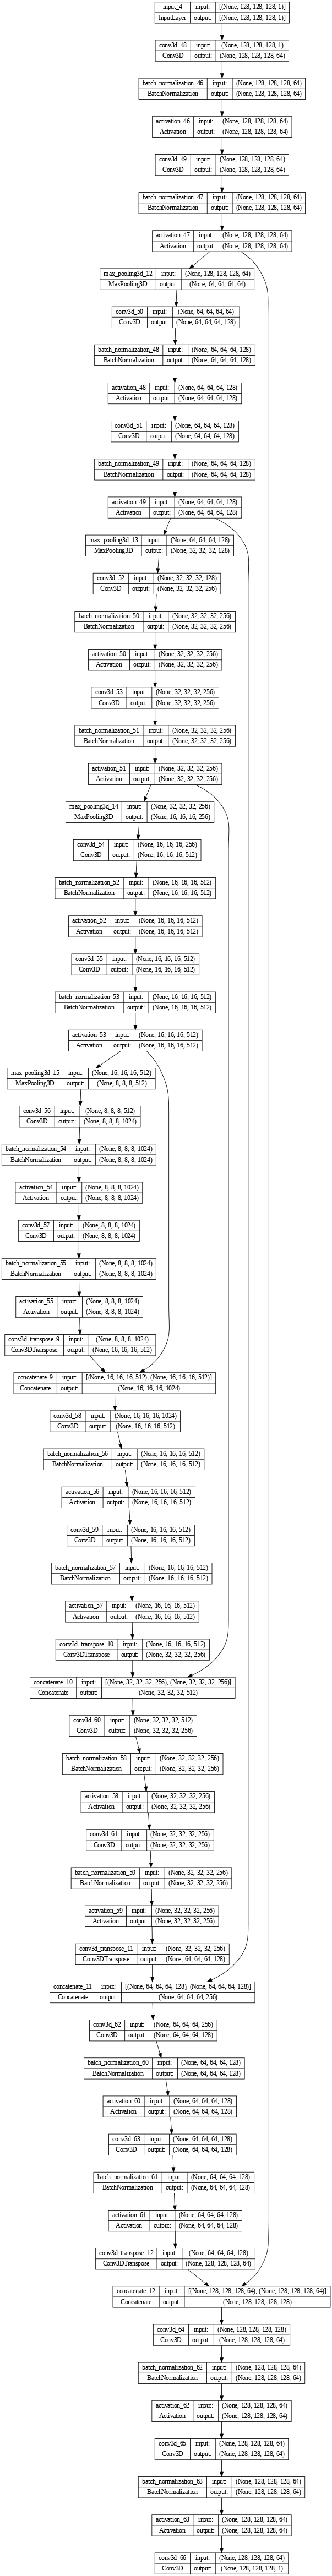

In [ ]:
utils.plot_model(model, show_shapes=True, dpi = 60)

В этом коде определены функции для создания сверточного блока, энкодера, декодера и собственно самой архитектуры 3D UNet. Затем создается экземпляр модели с указанием размеров входного изображения и количества классов.

Обратите внимание, что в этом примере предполагается, что ваши входные данные имеют размерность (128, 128, 128, 1), и задача сегментации является бинарной (num_classes=1). Вы можете настроить эти параметры в соответствии с вашими требованиями.

#Закачка исходных файлов

делаем один раз для создания набора файлов в виде папок train/test с классами из исходного Dataset.zip (оригинальные dcm-файлы) и "PleThora Effusions June 2020.zip" (сегментированные файлы)

по итогам: 
- train/class_effusions|class_noeffusions/*.tif
- test/class_effusions|class_noeffusions/*.tif

##загрузка "Dataset.zip" - оригинальные снимки (.dcm)

In [ ]:
# FLD_TEMP = "/content/Dataset")
# !rm -R $FLD_TEMP

# удалить папку Dataset в текущей директории
remove_dirs(os.getcwd(), ["Dataset"])

В папке /content удалены директории:
   Dataset


In [ ]:
# загружаем архив dataset.zip (оригинальные изображения dcm)
# !!!!! большой размер, невозможно проверить на вирусы, из-за этого "Access denied", 
# !!!!! но файл в папке Колаба появляется, можно распаковывать

# загрузка файлов из общей папки Гугла c id=FLD_ID в память ноутбука в папку /content/
with timex():
  try:
    files_list = gdown.download_folder(id=FLD_ID, output=os.getcwd(), quiet=True)
    print(f"Из общей папки загружены файлы:", *files_list, sep="\n  ")
  except Exception as ex:
    print(f"Ошибка: {ex}")

Из общей папки загружены файлы:
  /content/Dataset.zip
Время обработки: 234.75 с


In [ ]:
# распаковка Dataset.zip -> папка /content/Dataset; один снимок 3D = 75-297 файлов размерами 152х152
with timex():
  try:
    !unzip -qo Dataset.zip                    #-d $FLD_DATA 
    os.remove("Dataset.zip")                  # удаляем zip
  except Exception as e:
    print(f"Ошибка: {e}")
print()
# чистка памяти
gc.collect()

Время обработки: 365.34 с



1426

##загрузка "PleThora Effusions June 2020.zip" - сегментированные снимки (.nii.gz)

In [ ]:
# закачать с локальной папки архив с эффузией и распаковать в памяти Колаба (сегментированные изображения с выпотами); 
# один сегментированный снимок 3D = 1 файл 152х152х(75-297)
with timex():
  upload_and_extract(folder_name=os.getcwd())

print()
# чистка памяти
gc.collect()

Укажите файлы для загрузки:


Saving PleThora Effusions June 2020.zip to PleThora Effusions June 2020.zip
Загружен файл:   PleThora Effusions June 2020.zip
Распакован файл: PleThora Effusions June 2020.zip
Время обработки: 398.30 с



0

##смотрим картинки и прочие данные файлов

###смотрим файл-маску nii.gz, формируем массив-маску белых пикселей

<class 'nibabel.nifti1.Nifti1Image'>
<class 'numpy.ndarray'> float64
  размеры nii.gz-массив: (512, 512, 111)
  объем памяти: 232784016 b; 232 Mb
  min-max значения: 0.0 1.0


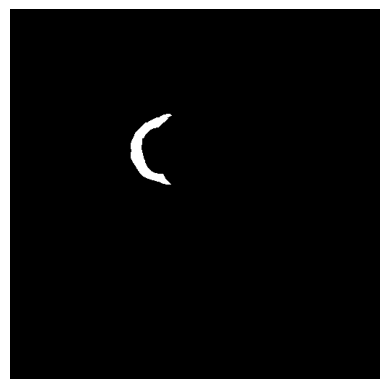

In [ ]:
# смотрим файл-маску nii.gz (файл 3D: 152х152х(75-297))
# -----------------------------------------------------
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив

# смотрим параметры изображения
print(type(img))
# print("  размеры nii.gz:", img.Rows, img.Columns)
# print("  объем памяти:", img.__sizeof__(), "b")
# print("  min-max значения:", img.SmallestImagePixelValue, img.LargestImagePixelValue)
# перевод к numpy массив, вывод
print(type(img_array), img_array.dtype)
print("  размеры nii.gz-массив:", img_array.shape)
print("  объем памяти:", img_array.__sizeof__(), "b;", int(img_array.__sizeof__() / 1000000), "Mb")
print("  min-max значения:", img_array.min(), img_array.max())

# Для отображения изображения в виде картинки можно использовать библиотеку matplotlib:
plt.imshow(img_array[:, :, 50], cmap="gray")                                        # отображение среза изображения по оси Z
plt.axis("off")
plt.show() 

# Для перевода изображения в numpy массив можно использовать метод get_fdata() объекта img:
# data = img.get_fdata()                                                            # получение данных изображения в виде numpy массива

# del img
# del img_array
# gc.collect()

In [ ]:
# смотрим разброс значений в 3D массиве из сегментированного изображения

print(img_array[:, :, 50].shape)
print(img_array[:, :, 50][:2, :10])
#print(img_array[:, :, 50].data)
print(np.unique(img_array))
print(np.unique(img_array, axis=2))

(512, 512)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 1.]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0

In [ ]:
# как работает np.unique по осям 3D-тензора
ax0 = np.unique(img_array, axis=0)
ax1 = np.unique(img_array, axis=1)
ax2 = np.unique(img_array, axis=2)

# как работает unique по осям 2D-тензора (берем конкретный срез)
cc_ax0 = np.unique(img_array[:, :, 50], axis=0)
cc_ax1 = np.unique(img_array[:, :, 50], axis=1)

# смотрим размерности полученных массивов
print(ax0.shape, ax1.shape, ax2.shape)
print(cc_ax0.shape, cc_ax1.shape)

(103, 512, 111) (512, 78, 111) (512, 512, 38)
(64, 512) (512, 54)


In [ ]:
# вариант np.unique - с возвратом счетчиков вхождений
ax2_ext = np.unique(img_array, axis=2, return_counts=True)

print(ax2_ext)

(array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0

In [ ]:
# распечатаем min-max значения по последней оси массива np.unique(по последней оси исходного массива)
for i in range(ax2.shape[2]):
  print(ax2[:, :, i].min(), ax2[:, :, i].max())

0.0 0.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


In [ ]:
# вариант np.unique - с возвратом индексов уникальных элементов (-> можно восстановить исходный массив)
ax2_ext2, idx_ext2 = np.unique(img_array, axis=2, return_inverse=True )

print(ax2_ext2)
print(idx_ext2)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[ 0  0  0 

In [ ]:
# переводим массив индексов в Boolean
# получаем маску для последней оси исходного 3D-массива - есть/нет выпот на конкретном срезе
print(np.bool8(idx_ext2))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]


In [ ]:
# смотрим параметры трех семгентированных файлов одного пациента (для сравнения)
filename1 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"   # имя файла
filename2 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_second_reviewer.nii.gz"  # имя файла
filename3 = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_third_reviewer.nii.gz"   # имя файла

img_array1 =  nib.load(filename1).get_fdata()                                          # перевод в numpy массив
img_array2 =  nib.load(filename2).get_fdata()                                          # перевод в numpy массив
img_array3 =  nib.load(filename3).get_fdata()                                          # перевод в numpy массив

print("Оригинальный снимок имеет 111 срезов")
print("Сегментированные снимки:")
print("  img_array1:", type(img_array1), img_array1.__sizeof__(), img_array1.shape, img_array1.dtype, img_array1.min(), img_array1.max() )
print("  img_array2:", type(img_array2), img_array2.__sizeof__(), img_array2.shape, img_array2.dtype, img_array2.min(), img_array2.max() )
print("  img_array3:", type(img_array3), img_array3.__sizeof__(), img_array3.shape, img_array3.dtype, img_array3.min(), img_array3.max() )

Оригинальный снимак имеет 111 срезов
Сегментированные снимки:
  img_array1: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0
  img_array2: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0
  img_array3: <class 'numpy.ndarray'> 232784016 (512, 512, 111) float64 0.0 1.0


###смотрим исходное изображение dcm

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 2237
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 2237


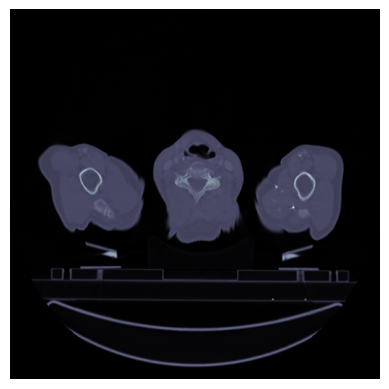

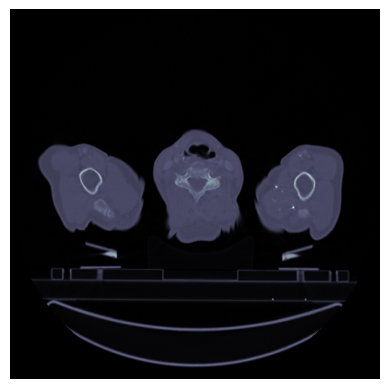

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 1442
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 1442


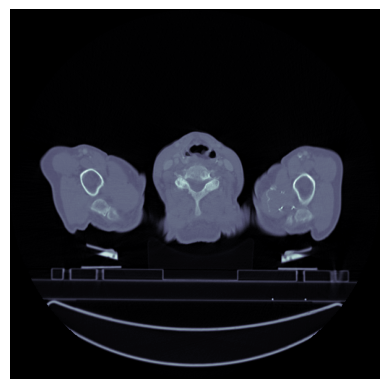

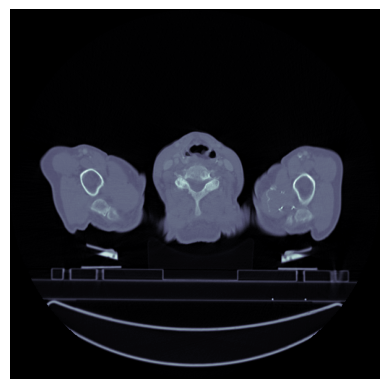

<class 'pydicom.dataset.FileDataset'>
  размеры dcm: 512 512
  объем памяти: 32 b
  min-max значения: -1024 1378
<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 1378


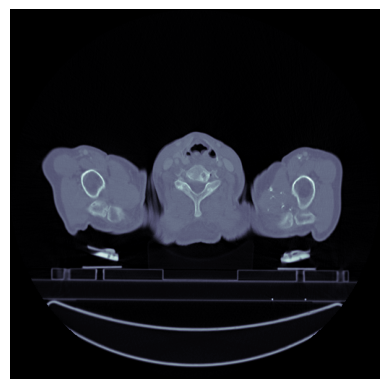

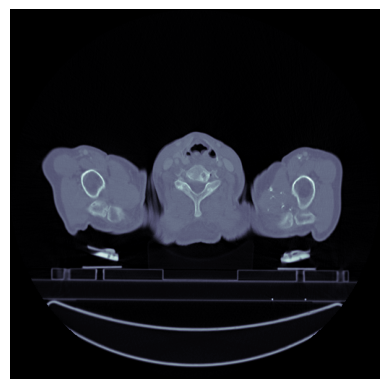

4248

In [ ]:
#смотрим исходное изображение dcm (75-297 файлов 2D: 152х152)
# -----------------------------------------------------------
# type(dcm_file) =             <class 'pydicom.dataset.FileDataset'>
# type(dcm_file.pixel_array) = <class 'numpy.ndarray'>

patient_dir = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228"

for file in sorted(os.listdir(patient_dir))[:3]:
  # загрузить файл dcm
  #dcm_file = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm") 
  dcm_file = dicom.dcmread(os.path.join(patient_dir, file))
  offset = dcm_file.RescaleIntercept
  # смотрим параметры изображения
  print(type(dcm_file))
  print("  размеры dcm:", dcm_file.Rows, dcm_file.Columns)
  print("  объем памяти:", dcm_file.__sizeof__(), "b")
  print("  min-max значения:", dcm_file.SmallestImagePixelValue, dcm_file.LargestImagePixelValue)
  # перевод к numpy массив, вывод
  print(type(dcm_file.pixel_array), dcm_file.pixel_array.dtype)
  print("  размеры dcm-массив:", dcm_file.pixel_array.shape)
  print("  объем памяти:", dcm_file.pixel_array.__sizeof__(), "b")
  print("  min-max значения:", dcm_file.pixel_array.min(), dcm_file.pixel_array.max())

  plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
  plt.axis("off")  
  plt.show()

  plt.imshow((dcm_file.pixel_array - dcm_file.RescaleIntercept), cmap=plt.cm.bone)   # cmap=plt.cm.gray
  plt.axis("off")  
  plt.show()


del dcm_file
gc.collect()

In [ ]:
# смотрим содержимое dcm файла LUNG1-001
dcm_file1 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm") 
print(dcm_file1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.307880158436639081057603825300678127628
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.99.99.3

In [ ]:
# смотрим содержимое dcm файла LUNG1-002
dcm_file2 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm") 
print(dcm_file2)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.32722.99.99.146690518896939717990238286069631301037
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20090530'
(0008, 0013) Instance Creation Time              TM: '130247'
(0008, 0014) Instance Creator UID  

In [ ]:
img_array = get_img("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")

print(type(img_array), img_array.dtype)
print("  размеры dcm-массив:", img_array.shape)
print("  объем памяти:", img_array.__sizeof__(), "b")
print("  min-max значения:", img_array.min(), img_array.max())

<class 'numpy.ndarray'> int16
  размеры dcm-массив: (512, 512)
  объем памяти: 128 b
  min-max значения: -1024 2237


In [ ]:
# смотрим содержимое dcm файла LUNG1-001
dcm_file1 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm") 
dcm_file2 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm")
dcm_file3 = dicom.dcmread("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm") 
print(dcm_file1.SliceThickness)
print(dcm_file2.SliceThickness)
print(dcm_file3.SliceThickness)

###пробуем примеры кода "открыть-вывести" от согруппников

Размерность изображения сегментирование плеврального выпота: высота: 512, ширина: 512, глубина:297
объем памяти: 622854288 b; 622 Mb


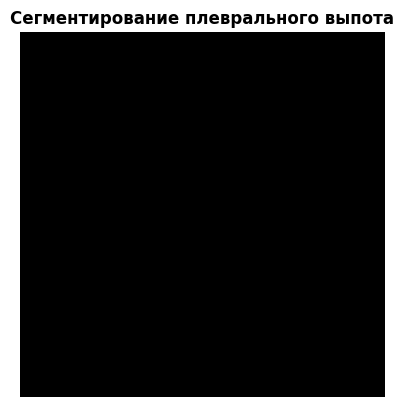

45

In [ ]:
n = 28
# Загрузка масок nii.gz (файл 3D: 152х152х(75-297))
# -------------------------------------------------
#image_path1 = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz"
   #image_path2 = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_second_reviewer.nii.gz"
image_path2 = "/content/Effusions/LUNG1-104/LUNG1-104_effusion_first_reviewer.nii.gz"  # у снимка 297 срезов
#image_obj1 = nib.load(image_path1)
image_obj2 = nib.load(image_path2)
# Конвертирует nii.gz в массив
#image_data1 = image_obj1.get_fdata()
image_data2 = image_obj2.get_fdata()
#rotated_image1 = np.rot90(image_data1)
# Отображает размеры файла
#height1, width1, depth1 = image_data1.shape
height2, width2, depth2 = image_data2.shape
#print(f"Размерность изображения сегментирование грудной клетки:  {height1}, ширина: {width1}, глубина:{depth1}")
print(f"Размерность изображения сегментирование плеврального выпота: высота: {height2}, ширина: {width2}, глубина:{depth2}")
print("объем памяти:", image_data2.__sizeof__(), "b;", int(image_data2.__sizeof__() / 1000000), "Mb")

# # Показывает изображения слоя
plt.figure(1, figsize=(16, 10))

# plt.subplot(1, 3, 1)
# plt.title('Оригинальное изображение', fontweight='bold')
# plt.imshow(ds.pixel_array, cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Сегментирование грудной клетки', fontweight='bold')
# plt.imshow(rotated_image1[:, :, n], cmap='gray')
# plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Сегментирование плеврального выпота', fontweight='bold')
plt.imshow(image_data2[:, :, n], cmap='gray')
plt.axis('off')

plt.show()

del image_obj2
del image_data2
gc.collect()

<class 'pydicom.dataset.FileDataset'> <class 'numpy.ndarray'> (512, 512)


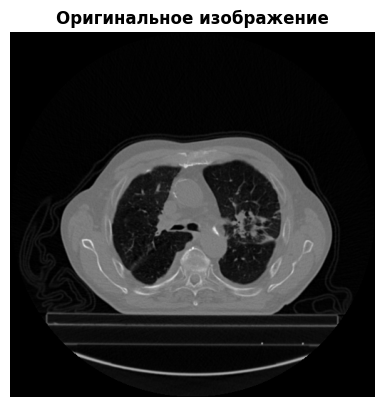

5355

In [ ]:
def get_img_test(image_path):
    rotated_image = None
    if image_path.endswith('.dcm'):
        image_obj = dicom.dcmread(image_path)
        image_np = image_obj.pixel_array
    if image_path.endswith('.gz'):
        image_obj = nib.load(image_path)
        #image_np = image_obj.get_fdata().astype(np.int32)
        #image_np = np.resize(image_obj.get_fdata(), (512,512, min_images))
        image_np = image_obj.get_fdata()
    return image_obj#, image_np


folder = f'/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046'
image_path = os.path.join(f'{folder}/1-050.dcm')
img1 = get_img_test(image_path)
img1_np = img1.pixel_array
print(type(img1), type(img1_np), img1_np.shape)

# img2 = get_img_test(os.path.join(f'{DATA_DIR}/{THOR_CAV_DIR}/LUNG1-001/LUNG1-001_thor_cav_primary_reviewer.nii.gz'))
# img2_np = img2.get_fdata().astype(np.int32)
# print(type(img2), type(img2_np), img2_np.dtype, img2_np.shape)

# img3 = get_img_test(os.path.join(f'/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz'))
# img3_np = img3.get_fdata()
# print(type(img3), type(img3_np), img3_np.dtype, img3_np.shape)

plt.figure(1, figsize=(16, 10))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение', fontweight='bold')
plt.imshow(img1_np, cmap='gray')
plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.title('Сегментирование грудной клетки', fontweight='bold')
# plt.imshow(img2_np[:, :, 50], cmap='gray')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.title('Сегментирование плеврального выпота', fontweight='bold')
# plt.imshow(img3_np[:, :, 50], cmap='gray')
# plt.axis('off')

plt.show()

del img1
del img1_np
gc.collect()

##переписываем срезы исходных изображений (dcm-файлы) как tiff  файлы в 2 папки: 

train/class_effusions | class_noeffusions

test/class_effusions | class_noeffusions

In [ ]:
# удаляем папки train, test
remove_dirs(os.getcwd(), ["train", "test"])

# создаем папки train, test
make_dirs(os.getcwd(), ["train/class_effusions", "train/class_noeffusions", "test/class_effusions", "test/class_noeffusions"])

В папке /content удалены директории:
   train
   test
В папке /content созданы директории:
   train/class_effusions
   train/class_noeffusions
   test/class_effusions
   test/class_noeffusions


создаем 2 списка пациентов: без выпотов и с выпотами, перемешиваем оба списка

для каждого списка пересохраняем файлы из исходной папки в папки train/test по папкам-классам (по доли TRAIN_TEST_RATIO)

In [ ]:
# список пациентов класс1 - из папки с сегментированными изображениями EFFUSIONS_DIR
patients_eff = sorted(os.listdir(EFFUSIONS_DIR))
# список пациентов класс0 - из папки с оригинальными изображениями ORIGINAL_DIR
patients_noeff = sorted(list(set(os.listdir(ORIGINAL_DIR)) - set(patients_eff)))

print("Всего пациентов без выпота:", len(patients_noeff))
print("Всего пациентов с выпотом:", len(patients_eff))
print(patients_noeff)
print(patients_eff)

Всего пациентов без выпота: 326
Всего пациентов с выпотом: 78
['LICENSE', 'LUNG1-004', 'LUNG1-006', 'LUNG1-007', 'LUNG1-009', 'LUNG1-010', 'LUNG1-011', 'LUNG1-012', 'LUNG1-015', 'LUNG1-017', 'LUNG1-019', 'LUNG1-020', 'LUNG1-022', 'LUNG1-023', 'LUNG1-025', 'LUNG1-027', 'LUNG1-029', 'LUNG1-030', 'LUNG1-032', 'LUNG1-033', 'LUNG1-034', 'LUNG1-036', 'LUNG1-037', 'LUNG1-039', 'LUNG1-040', 'LUNG1-041', 'LUNG1-043', 'LUNG1-044', 'LUNG1-045', 'LUNG1-047', 'LUNG1-048', 'LUNG1-049', 'LUNG1-052', 'LUNG1-054', 'LUNG1-055', 'LUNG1-056', 'LUNG1-057', 'LUNG1-059', 'LUNG1-062', 'LUNG1-063', 'LUNG1-064', 'LUNG1-066', 'LUNG1-067', 'LUNG1-070', 'LUNG1-071', 'LUNG1-072', 'LUNG1-073', 'LUNG1-075', 'LUNG1-076', 'LUNG1-077', 'LUNG1-078', 'LUNG1-079', 'LUNG1-080', 'LUNG1-081', 'LUNG1-082', 'LUNG1-084', 'LUNG1-086', 'LUNG1-087', 'LUNG1-089', 'LUNG1-090', 'LUNG1-092', 'LUNG1-094', 'LUNG1-096', 'LUNG1-098', 'LUNG1-099', 'LUNG1-100', 'LUNG1-101', 'LUNG1-102', 'LUNG1-103', 'LUNG1-105', 'LUNG1-106', 'LUNG1-108', 'LU

In [ ]:
# перемешиваем каждый список 
np.random.seed(333)
patients_noeff = list(np.random.permutation(patients_noeff))
patients_eff = list(np.random.permutation(patients_eff))

print(patients_noeff)
print(patients_eff)

['LUNG1-357', 'LUNG1-121', 'LUNG1-363', 'LUNG1-359', 'LUNG1-106', 'LUNG1-341', 'LUNG1-114', 'LUNG1-283', 'LUNG1-211', 'LUNG1-238', 'LUNG1-288', 'LUNG1-041', 'LUNG1-037', 'LUNG1-393', 'LUNG1-076', 'LUNG1-025', 'LUNG1-421', 'LUNG1-135', 'LUNG1-027', 'LUNG1-054', 'LUNG1-122', 'LUNG1-258', 'LUNG1-136', 'LUNG1-062', 'LUNG1-198', 'LUNG1-070', 'LUNG1-321', 'LUNG1-142', 'LUNG1-295', 'LUNG1-239', 'LUNG1-333', 'LUNG1-134', 'LUNG1-044', 'LUNG1-349', 'LUNG1-329', 'LUNG1-317', 'LUNG1-302', 'LUNG1-154', 'LUNG1-167', 'LUNG1-006', 'LUNG1-382', 'LUNG1-225', 'LUNG1-319', 'LUNG1-208', 'LUNG1-086', 'LUNG1-029', 'LUNG1-052', 'LUNG1-344', 'LUNG1-132', 'LUNG1-332', 'LUNG1-402', 'LUNG1-412', 'LUNG1-160', 'LUNG1-281', 'LUNG1-079', 'LUNG1-334', 'LUNG1-213', 'LUNG1-267', 'LUNG1-262', 'LUNG1-364', 'LUNG1-322', 'LUNG1-175', 'LUNG1-222', 'LUNG1-223', 'LICENSE', 'LUNG1-358', 'LUNG1-292', 'LUNG1-130', 'LUNG1-009', 'LUNG1-199', 'LUNG1-287', 'LUNG1-206', 'LUNG1-066', 'LUNG1-274', 'LUNG1-373', 'LUNG1-019', 'LUNG1-278', 

In [ ]:
# print(len(patients_noeff) * TRAIN_TEST_RATIO)
# print(len(patients_noeff[-int(len(patients_noeff) * TRAIN_TEST_RATIO) : ]))

In [ ]:
# переписываем исходные dcm-срезы в папки train/test по классам class_effusions/class_noeffusions

with timex():

  # пишем файлы пациентов без выпота (в целом) 
  #       в папку train: первую (1-TRAIN_TEST_RATIO) часть
  save_patients(patients_noeff[ : -int(len(patients_noeff) * TRAIN_TEST_RATIO)], "train", False) 
  #       в папку test:  последнюю TRAIN_TEST_RATIO часть
  save_patients(patients_noeff[-int(len(patients_noeff) * TRAIN_TEST_RATIO) : ], "test", False) 

  # пишем файлы пациентов с выпотом (в целом) 
  #       в папку train: первую (1-TRAIN_TEST_RATIO) часть
  save_patients(patients_eff[ : -int(len(patients_eff) * TRAIN_TEST_RATIO)], "train", True) 
  #       в папку test:  последнюю TRAIN_TEST_RATIO часть
  save_patients(patients_eff[-int(len(patients_eff) * TRAIN_TEST_RATIO) : ], "test", True)

In [ ]:
# делим файлы на train-test части в каждом классе
# !!!! не используем, т.к. делим по пациентам изначально
# with timex():
#   # перемещаем часть файлов из папки класса class_effusions в папку test
#   files_split_train_test(DATA_DIR, "class_effusions", "test", TRAIN_TEST_RATIO)
#   # перемещаем часть файлов из папки класса class_noeffusions в папку test
#   files_split_train_test(DATA_DIR, "class_noeffusions", "test", TRAIN_TEST_RATIO)

подготовленные tiff-файлы архивируем и скачиваем на локальный диск для 
дальнейшего использования: создания на их основе датасетов с помощью генератора

всего таким макаром подготовила 2 набора train,test:

- 1_хххххххх.zip - файлы с оригинальными значениями пикселей из dcm-файлов
- 2_хххххххх.zip - файлы с измененными (по формуле HU) значениями пикселей из dcm-файлов
- 3_хххххххх.zip - файлы с измененными (по формуле HU) значениями пикселей из dcm-файлов + нормирование к интервалу 0-1; этот вариант не сделала

In [ ]:
# архивируем папку test

with timex():
  # указываем путь к архиву и путь к папке, которую нужно заархивировать
  zip_dirs(archive_path=os.path.join(os.getcwd(),"test_dataset_tiff.zip"), 
           folder_path=os.path.join(os.getcwd(),"test"))

# копируем файл  из /content на гугл-диск
!cp "/content/train_dataset_tiff.zip" "/content/drive/MyDrive/tiff/train_dataset_tiff.zip"

# выгружаем архив test из /content
files.download(os.path.join(os.getcwd(),"test_dataset_tiff.zip"))

In [ ]:
# архивируем папку train

with timex():
  # указываем путь к архиву и путь к папке, которую нужно заархивировать
  zip_dirs(archive_path=os.path.join(os.getcwd(),"train_dataset_tiff.zip"), 
           folder_path=os.path.join(os.getcwd(),"train"))

# копируем файл  из /content на гугл-диск
!cp "/content/test_dataset_tiff.zip" "/content/drive/MyDrive/tiff/test_dataset_tiff.zip"

# выгружаем архив train  из /content
files.download(os.path.join(os.getcwd(),"train_dataset_tiff.zip"))

In [ ]:
# for file in sorted(os.listdir("/content/train/class_noeffusions")):
#   # path_dst = data_dir.split(sep="/")
#   # path_dst[-1] = target_dir
#   # path_dst = "/".join(path_dst)
#   os.replace(os.path.join("/content/train/class_noeffusions", file), 
#               os.path.join("/content/train2/class_noeffusions", file))
# print(os.listdir("/content/train/class_noeffusions"))



смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff (сохранялись **не предобработанные** пиксели!!!)


У пациента есть выпот, смотрим срезы с выпотом
Параметры изображения из файла: 
  тип <class 'nibabel.nifti1.Nifti1Image'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> uint8
  размеры             (512, 512, 111)
  объем памяти        29098128 b;
  min-max значения    0 1
  уникальные значения [0 1]


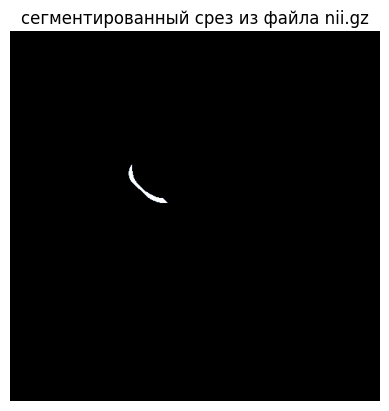

Параметры изображения из файла: 
  тип <class 'pydicom.dataset.FileDataset'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        128 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


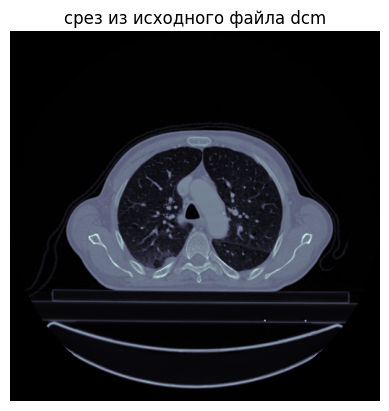

Параметры изображения из файла: 
  тип <class 'tifffile.tifffile.TiffPage'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


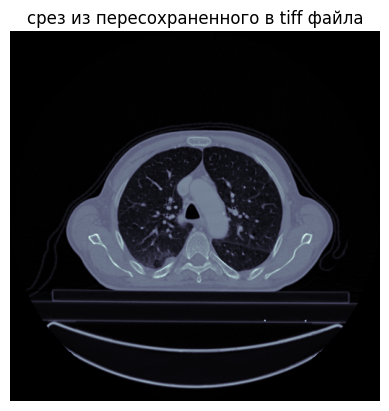

In [ ]:
# 1 ЕСТЬ ВЫПОТ на срезе
print("У пациента есть выпот, смотрим срезы с выпотом")
#plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
show_image(filename, nslice, "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
show_image(filename, nslice, "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
show_image(filename, nslice, "срез из пересохраненного в tiff файла")

In [ ]:
# 2 НЕТ ВЫПОТА на срезе
print("У пациента есть выпот, смотрим срезы без выпота")
plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 0
show_image(filename, nslice, (1, 3, 1), "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm"
show_image(filename, nslice, (1, 3, 2), "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
show_image(filename, nslice, (1, 3, 3), "срез из пересохраненного в tiff файла")

смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff (сохранялись **предобработанные** пиксели!!! без нормировки)

У пациента есть выпот, смотрим срезы с выпотом
Параметры изображения из файла: 
  тип <class 'nibabel.nifti1.Nifti1Image'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> uint8
  размеры             (512, 512, 111)
  объем памяти        29098128 b;
  min-max значения    0 1
  уникальные значения [0 1]


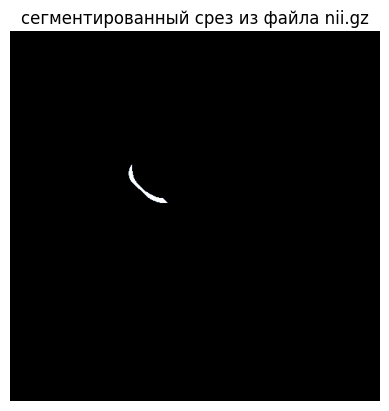

Параметры изображения из файла: 
  тип <class 'pydicom.dataset.FileDataset'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


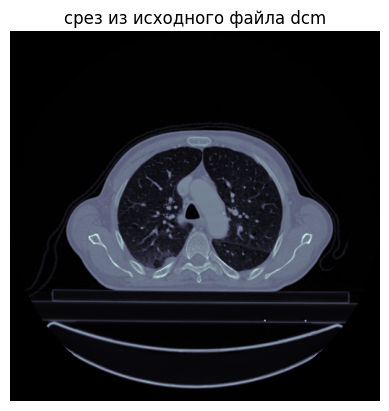

Параметры изображения из файла: 
  тип <class 'tifffile.tifffile.TiffPage'>
Параметры np-массива из изображения:
  тип элементов       <class 'numpy.ndarray'> int16
  размеры             (512, 512)
  объем памяти        524416 b;
  min-max значения    -1024 1248
  уникальные значения [-1024 -1023 -1022 ...  1209  1245  1248]


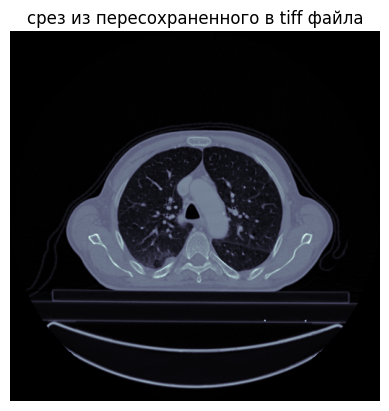

In [ ]:
# 1 ЕСТЬ ВЫПОТ на срезе
print("У пациента есть выпот, смотрим срезы с выпотом")
#plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
show_image(filename, nslice, "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
show_image(filename, nslice, "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002-{nslice + 1:03d}(1-{nslice + 1:03d}.dcm).tiff"
show_image(filename, nslice, "срез из пересохраненного в tiff файла")

In [ ]:
# 2 НЕТ ВЫПОТА на срезе
print("У пациента есть выпот, смотрим срезы без выпота")
plt.figure(1, figsize=(16, 10))

# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 0
show_image(filename, nslice, (1, 3, 1), "сегментированный срез из файла nii.gz")

# открываем срез из dcm 
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm"
show_image(filename, nslice, (1, 3, 2), "срез из исходного файла dcm")

# открываем срез из tiff
filename = f"/content/train/class_effusions/LUNG1-002-{nslice + 1:03d}(1-{nslice + 1:03d}.dcm).tiff"
show_image(filename, nslice, (1, 3, 3), "срез из пересохраненного в tiff файла")

смотрим оригинальные срезы из nii.gz и dcm и срезы из формата tiff

сегментированный срез 42 из первого файла nii.gz
пиксели в срезе: 0.0 1.0


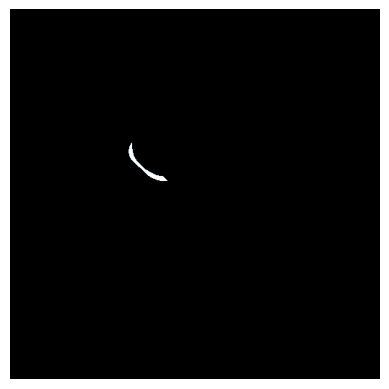

/content/train/class_effusions/LUNG1-002(1-042.dcm)042.tiff
262144 (512, 512)
пиксели в img_array_tiff: -1024 1248
Пересохраненный в формате tiff файл 1-042.dcm


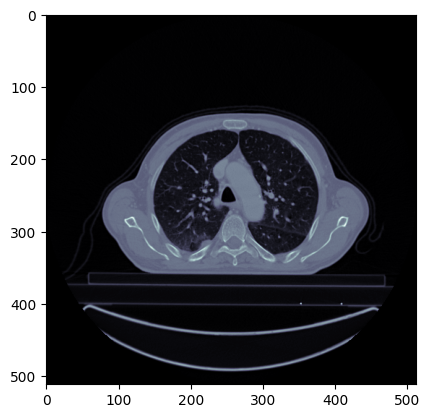

/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm
262144 (512, 512)
пиксели в dcm_file_array: -1024 1248
оригинальный файл 1-042.dcm; номер среза по сортировке = 42


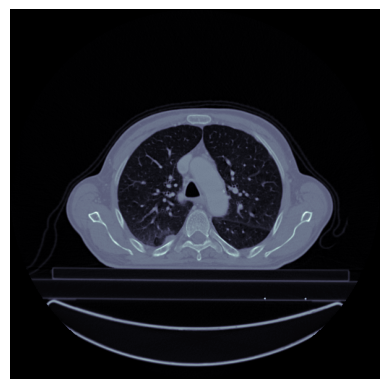

In [ ]:
# проверим, что срезы друг другу соответствуют

# 1 ЕСТЬ ВЫПОТ
# открываем срез сегментов из nii.gz 
filename = "/content/Effusions/LUNG1-002/LUNG1-002_effusion_first_reviewer.nii.gz"  # имя файла
nslice = 41
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив
print(f"сегментированный срез {nslice + 1} из первого файла nii.gz")
print("пиксели в срезе:", img_array[:, :, nslice].min(), img_array[:, :, nslice].max())
plt.imshow(img_array[:, :, nslice], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
plt.axis("off")
#plt.title(f"сегментированный срез {nslice + 1} из первого файла nii.gz") # , fontweight='bold')
plt.show() 

# открываем tiff-файл (--- было: png-файл)
filename = f"/content/train/class_effusions/LUNG1-002(1-{nslice + 1:03d}.dcm){nslice + 1:03d}.tiff"
# img_png = Image.open(filename)
# img_array_png = np.array(img_png)
img_array_tiff = tifffile.imread(filename).astype(np.int16)
print(filename)
print(img_array_tiff.size, img_array_tiff.shape)
print("пиксели в img_array_tiff:", img_array_tiff.min(), img_array_tiff.max())
print(f"Пересохраненный в формате tiff файл 1-{nslice + 1:03d}.dcm")
#img.show()
plt.imshow(img_array_tiff, cmap=plt.cm.bone)
plt.show() 

# открываем оригинальный файл .dcm
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-042.dcm"
dcm_file = dicom.dcmread(filename)
dcm_file_array = dcm_file.pixel_array
print(filename)
print(dcm_file_array.size, dcm_file_array.shape)
print("пиксели в dcm_file_array:", dcm_file_array.min(), dcm_file_array.max())
print(f"оригинальный файл 1-{nslice + 1:03d}.dcm; номер среза по сортировке = {nslice + 1}")
plt.imshow(dcm_file_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
plt.axis("off")  
#plt.title(f"оригинальный файл 1-{nslice + 1:03d}.dcm; номер среза по сортировке = {nslice + 1}") # , fontweight='bold')
plt.show()

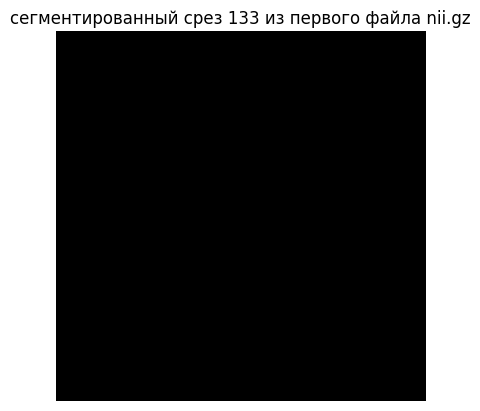

(512, 512)
Пересохраненный в формате png файл 1-001.dcm


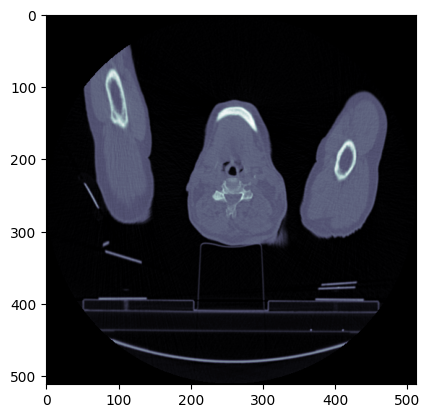

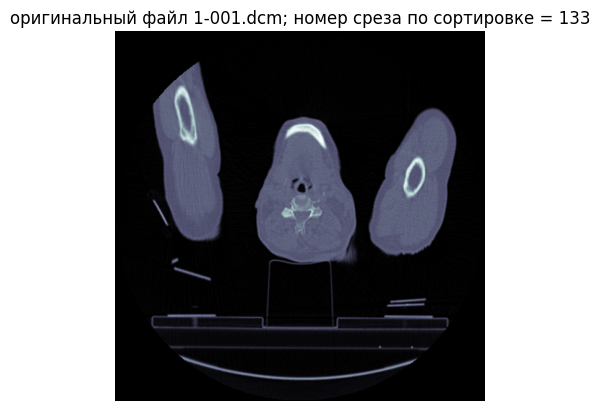

In [ ]:
# проверим, что срезы друг другу соответствуют

# 2 НЕТ ВЫПОТА
# открываем срез сегментов 107 в nii.gz (/content/train/class_noeffusions/LUNG1-001(1-001.dcm)133.png  - картинка без выпота)
filename = "/content/Effusions/LUNG1-001/LUNG1-001_effusion_first_reviewer.nii.gz"  # имя файла
img = nib.load(filename)                                                            # загрузка файла в память
img_array = img.get_fdata()                                                         # перевод в numpy массив
plt.imshow(img_array[:, :, 1], cmap=plt.cm.bone)          # cmap="gray"           # отображение среза изображения по оси Z
plt.axis("off")
plt.title("сегментированный срез 133 из первого файла nii.gz") # , fontweight='bold')
plt.show() 

# открываем tiff-файл (--- было: png-файл) 1-027
filename = "/content/train/class_noeffusions/LUNG1-001(1-001.dcm)133.tiff"
# img_png = Image.open(filename)
# img_array_png = np.array(img_png)
img_array_tiff = tifffile.imread(filename).astype(np.int16)
print(img_array_tiff.size)
print("Пересохраненный в формате tiff файл 1-001.dcm")
#img.show()
plt.imshow(img_array_tiff, cmap=plt.cm.bone)
plt.show() 

# открываем оригинальны файл 1-001.dcm
filename = "/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm"
dcm_file = dicom.dcmread(filename)
plt.imshow(dcm_file.pixel_array, cmap=plt.cm.bone)   # cmap=plt.cm.gray
plt.axis("off")  
plt.title("оригинальный файл 1-001.dcm; номер среза по сортировке = 133") # , fontweight='bold')
plt.show()

In [ ]:
print("значения в массиве nii.gz", img_array[:, :, 107].min(), img_array[:, :, 107].max())
print("значения в массиве tiff", img_array_tiff.min(), img_array_tiff.max())
print("значения в массиве dcm", dcm_file.pixel_array.min(), dcm_file.pixel_array.max())


значения в массиве nii.gz 0.0 0.0
значения в массиве png 0 2535
значения в массиве dcm 0 2535


#Закачка подготовленных файлов

для создания датасетов

из архивов:

- n_train_dataset_tiff.zip
- n_test_dataset_tiff.zip

In [ ]:
# закачать/распаковать с ЛОКАЛЬНОЙ папки архив с папкой train (tiff-файлы исходных dcm-срезов) и распаковать в памяти Колаба 
with timex():
  upload_and_extract(folder_name=os.getcwd())

print()
# чистка памяти
gc.collect()

In [ ]:
# закачать/распаковать с ЛОКАЛЬНОЙ папки архив с папкой test (tiff-файлы исходных dcm-срезов) и распаковать в памяти Колаба 
with timex():
  upload_and_extract(folder_name=os.getcwd())

print()
# чистка памяти
gc.collect()

In [ ]:
# распаковать наборы train/test из ГУГЛ-ДИСКА
!unzip -qo "/content/drive/MyDrive/tiff/2_train_dataset_tiff.zip"
!unzip -qo "/content/drive/MyDrive/tiff/2_test_dataset_tiff.zip"

#Создание датасетов

##проверка исходных данных (Dataset), попытка собрать в памяти датасеты X,Y

проверяем количество папок, файлов (= срезов) в оригинальных изображениях (убеждаемся, что структура папок = пациент/папка1/папка2/файлы)

собираем пути к файлам, собираем np-массив из файлов

UPD: вылетает по памяти ОЗУ; такой способ не подходит

In [ ]:
# словарь для подсчета количеств папок и файлов по каждому пациенту
patients_counts = {}
count_dirs = 0
count_files = 0
# словарь для сохранения путей и имен файлов по каждому пациенту
patients_files_path = {}
patients_root = ""
patients_files = ""

for patient_id in sorted(os.listdir(ORIGINAL_DIR)):      # цикл по папкам LUNG1-xxx
  patient_path = ORIGINAL_DIR + "/" + patient_id
  if os.path.isdir(patient_path):
    count_dirs = 0
    count_files = 0
    patients_root = ""
    patients_files = ""
    for root, dirs, files in os.walk(patient_path):      # текущая папка, список подпапок, список файлов
      count_dirs += len(dirs)
      count_files += len(files)
      patients_root = root
      patients_files = sorted(files)
      # print(root)                                        # текущая папка
      # print(dirs)                                        # список подпапок в текущей папке
      # print(files)                                       # список файлов в текущей папке
      # print(count_dirs, count_files)
      #break                                              # чтобы предотвратить проход по подпапкам
    patients_counts[patient_id] = [int(patient_id[-3:])+1000, count_dirs, count_files, 0]
    patients_files_path[patient_id] = [patients_root, patients_files]

# массив: каждая строка = пациент; 
# 1 столбец = (номер пациента+1000), 2 столбец = число папок, 
# 3 столбец = число файлов(срезов), 4 столбец - признак наличия выпота (= 0)
patients = np.array(list(patients_counts.values()))  

print(f"Всего пациентов: {patients.shape[0]}")
print(f"Число папок в каждом пациенте  (min-max): {min(patients[:, 1])} - {max(patients[:, 1])}")
print(f"Число файлов в каждом пациенте (min-max): {min(patients[:, 2])} - {max(patients[:, 2])}")

del count_dirs
del count_files
del patients_root
del patients_files
gc.collect()

Всего пациентов: 402
Число папок в каждом пациенте  (min-max): 2 - 2
Число файлов в каждом пациенте (min-max): 75 - 297


953

In [ ]:
# проверка словарей
print(len(patients_counts))
print(len(patients_files_path))

402
402


In [ ]:
# проверка
print("Пациенты с min-max количеством срезов:")
print(patients[np.where(np.isin(patients, [297, 75]))[0], :])

Пациенты с min-max количеством срезов:
[[1104    2  297    0]
 [1215    2   75    0]]


**вариант обрабатывать 3D:**

для оригинальных изображений - нужно склеить все срезы в один массив

для сегментированных изображений - нужно создать массив, где для каждого пациента ставим 1/0 в зависимости от того, есть/нет папка пациента в Эффузии

собираем датасеты: X - массив изображений 2D; Y - массив меток 0/1

UPD: !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  не вышло - вылетает по памяти ОЗУ

In [ ]:
# список id пациентов с выпотами
eff_patients = [int(patient_id[-3:])+1000 for patient_id in sorted(os.listdir(EFFUSIONS_DIR))]
print(f"Всего пациентов с выпотами: {len(eff_patients)}")

Всего пациентов с выпотами: 78


In [ ]:
# делаем отметки по массиву пациентов, у которых есть снимки с выпотами
#print(np.isin(patients, eff_patients))
#print(patients[np.where(np.isin(patients, eff_patients))[0], :])

patients[np.where(np.isin(patients, eff_patients))[0], 3] = 1         # меняем значение последнего стобца в массиве пациентов

print(f"Всего отметок в массиве: {np.count_nonzero(patients[:, 3])}") # проверяем

# !!! в оригинальных изображениях нет папки для LUNG1-095; но есть сегментированные снимки выпота
# поэтому есть разница в количестве пациентов с выпотами и отметками в общем списке пациентов

Всего отметок в массиве: 77


In [ ]:
with timex():
  img_list = []        # список изображений
  img_label = []       # список меток

  #i = 0
  # цикл по словарю с путями к файлам: каждый файл с исходным изображением добавляем в список, добавляем соответствующую метку
  for patient_id, paths in patients_files_path.items():
    gc.collect()
    for file in paths[1]:
      img_list.append(get_img(os.path.join(paths[0], file)))
      img_label.append(patients[np.where(patients == int(patient_id[-3:])+1000)[0], 3])
      print(os.path.join(paths[0], file))
    #i += 1
    #if i > 3: break

x_data = np.array(img_list, dtype=np.int16)
y_data = np.array(img_label, dtype=np.int8)

del img_list
del img_label
gc.collect()

152 пациента = 10Г (из 12Г всего)

на 402 пациента нужно ~ 26Г

вылетаем по памяти ОЗУ на 206 пациенте

In [ ]:
# смотрим размеры
print(x_data.shape, y_data.shape)

(450, 512, 512) (450, 1)


In [ ]:
# смотрим мин-макс значения, тип
print(x_data.min(), x_data.max(), x_data.dtype)
print(y_data.min(), y_data.max(), y_data.dtype)

-1024 4087 int16
0 1 int8


##создаем датасеты из файлов на диске Колаба с помощью генератора

**tf.keras.preprocessing.image.ImageDataGenerator**

проблема:

генератор преобразует файлы в 1/3/4 канала; предобученная сеть принимает на вход только 3 канала

вариант: 
- открыли файлы с 1 каналом (батч из генератора)
- пропустили тензор через слой, который дублирует канал 3 раза -> имеем массивы нужной формы
- передаем на вход предобученной части модели (базовая модель)




In [ ]:
# создаем объект генератора для TRAIN
train_datagen = ImageDataGenerator(
    # rescale=1./255,             # масштабируем значения пикселей ?????
    validation_split=0.2,         # доля изображений,зарезервированных для проверки
    # dtype                       # Dtype,используемый для сгенерированных массивов
    # rotation_range=20,          # случайный поворот изображения на 20 градусов
    # width_shift_range=0.1,      # случайное смещение изображения по горизонтали на 10%
    # height_shift_range=0.1,     # случайное смещение изображения по вертикали на 10%
    # horizontal_flip=True,       # отражение по горизонтали
    # vertical_flip=False         # отражение по вертикали

    # функция, которая будет применена к каждому изображению. Функция выполняется после всех преобразований
    # import cv2
    # lambda x: cv2.cvtColor(x, cv2.COLOR_GRAY2RGB) - преобразование изображения в RGB формат
    #preprocessing_function=lambda x: np.repeat(x, 3, axis=-1),  

    # Если True, то делит каждый элемент входного набора данных на сренеквадратическое отклонение по всему набору.
    #  нормализует данные по каждому признаку (фиче) входного изображения (среднее значение каждого признака будет = 0, а стандартное отклонение будет = 1)
    # featurewise_std_normalization=False 

    # Если True, то делит каждый элемент входного набора данных на сренеквадратическое отклонение этого элемента.
    # нормализует данные по каждому примеру отдельно (среднее значение каждого пикселя в изображении будет = 0, а стандартное отклонение будет = 1)
    samplewise_std_normalization=True  
)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1469: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


In [ ]:
# создаем датасеты train, validation

train_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,                                    # путь к директории с изображениями
    subset="training",                                      # "training" или "validation", если validation_split установлен в ImageDataGenerator
    target_size=(IMG_HEIGHT, IMG_WIDTH),                    # размер изображений (ширина, высота)
    keep_aspect_ratio=True,                                 # нужно ли изменять размер изображений до заданного размера без искажения соотношения сторон
    color_mode="grayscale",                                 # в какое число каналов будет преобразовано  "grayscale"; по умолчанию = "rgb"
    classes=CLASSES_NAME,                                   # список классов
    class_mode="binary",                                    # тип задачи (бинарная классификация)
    batch_size=BATCH_SIZE,                                  # размер батча
    shuffle=True,                                           #
    seed=37
    #save_to_dir=, save_prefix=, 
    #save_format="png"                                       # один из «png», «jpeg», «bmp», «pdf», «ppm», «gif», «tif», «jpg»
)

validation_generator = train_datagen.flow_from_directory(
    directory=TRAIN_DIR,                                    # путь к директории с изображениями
    subset="validation",                                    # "training" или "validation", если validation_split установлен в ImageDataGenerator
    target_size=(IMG_HEIGHT, IMG_WIDTH),                    # размер изображений (ширина, высота)
    keep_aspect_ratio=True,                                 # нужно ли изменять размер изображений до заданного размера без искажения соотношения сторон
    color_mode="grayscale",                                 # в какое число каналов будет преобразовано  "grayscale"; по умолчанию = "rgb"
    classes=CLASSES_NAME,                                   # список классов
    class_mode="binary",                                    # тип задачи (бинарная классификация)
    batch_size=BATCH_SIZE,                                  # размер батча
    shuffle=True,                                           #
    seed=37
    #save_to_dir=, save_prefix=, 
    #save_format="png"                                       # один из «png», «jpeg», «bmp», «pdf», «ppm», «gif», «tif», «jpg»
)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Found 30960 images belonging to 2 classes.
Found 7739 images belonging to 2 classes.


In [ ]:
# создаем объект генератора для TEST
test_datagen = ImageDataGenerator(
    # rescale=1./255,         # масштабируем значения пикселей
    # функция, которая будет применена к каждому изображению. Функция выполняется после всех преобразований
    # preprocessing_function=None 

    # Если True, то делит каждый элемент входного набора данных на сренеквадратическое отклонение по всему набору.
    #  нормализует данные по каждому признаку (фиче) входного изображения (среднее значение каждого признака будет = 0, а стандартное отклонение будет = 1)
    # featurewise_std_normalization=False 

    # Если True, то делит каждый элемент входного набора данных на сренеквадратическое отклонение этого элемента.
    # нормализует данные по каждому примеру отдельно (среднее значение каждого пикселя в изображении будет = 0, а стандартное отклонение будет = 1)
    # samplewise_std_normalization=False  
)


# создаем датасет test
test_generator = test_datagen.flow_from_directory(
    directory=TEST_DIR,                                     # путь к директории с изображениями
    #subset="validation",                                   # "training" или "validation", если validation_split установлен в ImageDataGenerator
    target_size=(IMG_HEIGHT, IMG_WIDTH),                    # размер изображений (ширина, высота)
    keep_aspect_ratio=True,                                 # нужно ли изменять размер изображений до заданного размера без искажения соотношения сторон
    color_mode="grayscale",                                 # в какое число каналов будет преобразовано  "grayscale"; по умолчанию = "rgb"
    classes=CLASSES_NAME,                                   # список классов
    class_mode="binary",                                    # тип задачи (бинарная классификация); None: не будут возвращаться метки, только пакеты данных X
    batch_size=BATCH_SIZE,                                  # размер батча
    shuffle=True,                                           #
    seed=42
    #save_to_dir=, save_prefix=, 
    #save_format="png"                                      # один из «png», «jpeg», «bmp», «pdf», «ppm», «gif», «tif», «jpg»
)

In [ ]:
# def make_generator():
#     train_datagen = ImageDataGenerator(rescale=1. / 255)
#     train_generator =
#     train_datagen.flow_from_directory(train_dataset_folder,target_size=(224, 224), class_mode='categorical', batch_size=32)
#     return train_generator

# train_dataset = tf.data.Dataset.from_generator(make_generator,(tf.float32, tf.float32))

(512, 512, 1) float32 -0.75689423 4.596661
(10,) labels= 0.0


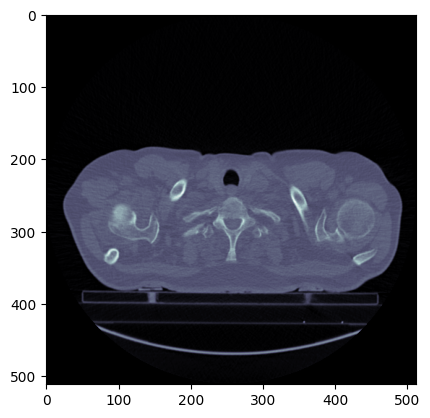

3394

In [ ]:
for  imgs, labels in train_generator:
  print(imgs.shape, imgs.dtype, imgs[0].min(), imgs[0].max())
  print(labels.shape, "labels=", labels[0])
  plt.imshow(imgs[0], cmap=plt.cm.bone)  #.astype("int16"))
  plt.show()
  break

del imgs
del labels
gc.collect() 

In [ ]:
# class_n = train_generator.class_names
# print(class_n)

In [ ]:
# plt.figure(figsize=(16, 16))
# for images, labels in train_generator.take(1):
#   for i in range(32):
#     ax = plt.subplot(4, 8, i + 1)
#     plt.imshow(images[i].numpy().astype("int16"), cmap=plt.cm.bone)
#     plt.title(class_n[labels[i]])
#   plt.show()

In [ ]:
#@title пример использование утилиты "tf.keras.utils.image_dataset_from_directory" и tf.data.Dataset
# https://www.tensorflow.org/tutorials/load_data/images
# https://www.tensorflow.org/tutorials/images/classification

# ------------------------------------------------------------------------------
# 1 используем tf.keras.utils.image_dataset_from_directory для создания датасета
# создать обучающий датасет
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# создать проверочный датасет
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# имена классов
class_names = train_ds.class_names
print(class_names)
# вывести первые 9 картинок первого батча в датасете
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("int16"), cmap=plt.cm.bone)
    plt.title(class_names[labels[i]])
    plt.axis("off")
# датасет можно перебирать в цикле
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break   
# нормализация
# используем слой tf.keras.layers.Rescaling
# to scale pixel values to [-1,1] you can instead write tf.keras.layers.Rescaling(1./127.5, offset=-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
# вариант 1
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# проверяем значения пикселей: Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
# вариант 2 - вставить слой нормализации в модель

# нужно обязательно добавлять, чтобы что-то там улучшить
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# собираем модель
num_classes = 5
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
# обучаем модель
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)
# ------------------------------------------------------------------------------
# 2 используем tf.data.Dataset для осздания датасета
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
for f in list_ds.take(5):
  print(f.numpy())
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)
# создаем датасеты
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)
# длина датасетов
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())
# функции 
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width]) 
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
# вывести первые 9 картинок первого батча в датасете
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

#Модель

**ResNet50**

In [ ]:
gc.collect()                                                        # Сборка мусора для освобождения памяти

#image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)                           # Определяем входную размерность в соответствии требованиям модели
image_shape = (IMG_HEIGHT, IMG_WIDTH)                               # Определяем входную размерность в соответствии с нашей потребностью

repeat_layer = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1)) # дублируем массив по последнй оси: из 1 канального делаем 3 канальный
preprocess_input = tf.keras.applications.resnet50.preprocess_input        # Нормализация данных на вход в соответствии требованиям модели
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()           # Задаем слой GlobalAveragePooling2D
prediction_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")   # Задаем выходной слой на нужное нам количество классов

#input_tensor = tf.keras.layers.Input(shape=image_shape)
input = tf.keras.layers.Input(shape=(image_shape + (1,)))
input_tensor = repeat_layer(input)
#input_tensor = input

gc.collect()                                                        # Сборка мусора для освобождения памяти

# Создаем базовую модель ResNet50:
base_model = tf.keras.applications.resnet50.ResNet50(
                         input_shape=image_shape + (3,), 
                         #input_tensor=input_tensor, 
                         include_top=False,                         # Не включаем верхнюю часть модели, чтобы можно было использовать свои входные размерности
                         weights='imagenet')                        # Используем веса уже предобученной модели на базе Imagenet

# Собираем полную модель, состоящую из всех наших определенных слоев и базовой модели ResNet50:
#input = tf.keras.Input(shape=(image_shape))
#x = data_augmentation(input)
x = preprocess_input(input_tensor)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)
output = prediction_layer(x)

model = tf.keras.Model(inputs=input, outputs=output)

#model = tf.keras.Model(inputs=input, outputs=x)


gc.collect()                                                        # Сборка мусора для освобождения памяти

94765736/94765736 [==============================] - 0s 0us/step


8413

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 lambda (Lambda)             (None, 512, 512, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 512, 512, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 512, 512, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [ ]:
# #checkpoints = ModelCheckpoint(f"/content/drive/MyDrive/CARS-ULTRAPRO/model_cars_weights.h5", 
# checkpoints = ModelCheckpoint(f"/content/drive/MyDrive/CARS-ULTRAPRO", 
#                               monitor="val_categorical_accuracy",
#                               save_weights_only=False, 
#                               mode="max",
#                               save_best_only=True)

In [ ]:
# компиляция модели
LEARNING_RATE = 1e-3

loss_fn = lss.BinaryCrossentropy()                   # lss.SparseCategoricalCrossentropy()     lss.CategoricalCrossentropy() 
opt_fn = opt.Adam(learning_rate=LEARNING_RATE)
metr_fn = mtr.BinaryAccuracy()                       # mtr.SparseCategoricalAccuracy()         mtr.CategoricalAccuracy()

model.compile(loss=loss_fn, optimizer=opt_fn, metrics=[metr_fn])

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),       # Оптимизатор Adam c заданным ранее шагом обучения
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Ошибка SparseCategoricalCrossentropy
#               metrics=['accuracy'])                                                  # Метрика Accuracy

In [ ]:
print(train_generator.samples, train_generator.samples // BATCH_SIZE)
print(validation_generator.samples, validation_generator.samples // BATCH_SIZE)
print(BATCH_SIZE)
gc.collect()

30960 3096
7739 773
10


0

In [ ]:
# BATCH_SIZE = 7 #64
# gc.collect() 

In [ ]:
CurrentTime = time.time()                       # Засекаем время для измерения времени обучения нейронной сети

# обучаем модель  
history = model.fit(
    train_generator,
    # steps_per_epoch - указывает сколько раз нужно обратиться модели к генератору за получением новых данных
    steps_per_epoch = train_generator.samples // BATCH_SIZE,                    # количество шагов (обращение к генератору за данными) в эпохе
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,              # количество шагов (обращение к генератору за данными) в эпохе
    epochs=EPOCHS,
    verbose=1 
    #callbacks=[checkpoints]
)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

print()
print("Максимальная точность на тестовой выборке:", max(history.history["val_binary_accuracy"]))

Epoch 1/10
3096/3096 [==============================] - 1769s 553ms/step - loss: 2014.0634 - binary_accuracy: 0.8957 - val_loss: 51.4431 - val_binary_accuracy: 0.9206
Epoch 2/10
3096/3096 [==============================] - 1678s 542ms/step - loss: 1258.6176 - binary_accuracy: 0.8912 - val_loss: 498.6164 - val_binary_accuracy: 0.9208
Epoch 3/10
3096/3096 [==============================] - 1676s 541ms/step - loss: 267.1952 - binary_accuracy: 0.8799 - val_loss: 0.2775 - val_binary_accuracy: 0.9206
Epoch 4/10
3096/3096 [==============================] - 1706s 551ms/step - loss: 0.2826 - binary_accuracy: 0.9206 - val_loss: 0.2776 - val_binary_accuracy: 0.9207
Epoch 5/10
3096/3096 [==============================] - 1695s 548ms/step - loss: 0.2809 - binary_accuracy: 0.9206 - val_loss: 0.2850 - val_binary_accuracy: 0.9207
Epoch 6/10
3096/3096 [==============================] - 1676s 541ms/step - loss: 69422.8281 - binary_accuracy: 0.8743 - val_loss: 0.2781 - val_binary_accuracy: 0.9206
Epoch 7

**Предварительные итоги**


1. использование оригинальных dcm без преобразований HU (+ в генераторе параметр samplewise_std_normalization=True):

- loss при обучении был в обычных пределах (0.ххххх); 
- val_точность = 92.06-92.08

2. использование оригинальных dcm с преобразованием HU (+ в генераторе параметр samplewise_std_normalization=True)

- loss при обучении скачет туда-сюда от очень высоких значений до 0.xxxx;
- val_точность = 92.06-92.08

Оба варианта - не удалось до конца пройти все 10 эпох (не хватает времени с GPU).

Результаты на проверочной выборке для п.1 и п.2 - одинаковые. 

В целом выглядит так, будто сеть не учится: сразу 92.хх% на проверочной, и на этом стоит все обучение.

Возможно, я неверно применяю использование предобученной сети (подход взят из учебного ноутбука).

Была задумка попробовать другие предобученные сети, но бинарную классификацию отменили.

In [ ]:
# вывод графиков обучения
# -----------------------
plot_show(["binary_accuracy", "loss"])

# param_list = ["categorical_accuracy", "loss"]
# axis_titles = ["График точности", "График ошибок"]
# label_list = ["Доля верных ответов", "Ошибка"]
# plt.figure(figsize=(15,5))
# for i in range(2):
#     plt.subplot(1,2, i+1)
#     plt.title(axis_titles[i])
#     plt.plot(history.history[param_list[i]], label=label_list[i] + ' на обучающем наборе')
#     plt.plot(history.history['val_' + param_list[i]], label=label_list[i] + ' на проверочном наборе')
#     plt.xlabel('Эпоха обучения')
#     plt.ylabel(label_list[i])
#     plt.legend()
#     plt.grid(which = 'major', color = 'black', alpha = 0.3)
#     plt.minorticks_on()
#     plt.grid(which = 'minor', color = 'gray', alpha = 0.3, linestyle = '--')
# plt.show()

#Песочница

##примеры из туториала

https://pydicom.github.io/pydicom/stable/tutorials/dataset_basics.html

чтение файла dcm, содержание датасета

In [ ]:
# версия
print(dicom.__version__)

# путь к тестовому датасету dicom
fpath = dicom.data.get_testdata_file("CT_small.dcm")    # версия pydicom > 1.4
#fpath = get_testdata_files("CT_small.dcm")[0]          #                < 1.4

# читаем датасет
#ds = dicom.dcmread(fpath)
#ds = dcmread(fpath, force=True)                         # если файл не содержит правильных мета-данных, но содержит DICOM data
with open(fpath, 'rb') as f:
  ds = dicom.dcmread(f)

print(type(ds))                                         # <class 'pydicom.dataset.FileDataset'>

2.3.1
<class 'pydicom.dataset.FileDataset'>


In [ ]:
print(type(ds.SliceLocation))

<class 'pydicom.valuerep.DSfloat'>


In [ ]:
print([ds.SliceLocation])

['-77.2040634155']


In [ ]:
A = (1,2)
A = A + (ds.SliceLocation, )
print(A)
print(type(A[-1]))

(1, 2, '-77.2040634155')
<class 'pydicom.valuerep.DSfloat'>


In [ ]:
# просмотр всего датасета:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

In [ ]:
# доступ к отдельным элементам датасета:
# 1 - через теги: (группа, элемент в группе)
# 2 - через keyword: обычно = имя элемента без пробелов
# (0008, 0016) SOP Class UID                       UI: CT Image Storage
elem = ds[0x0008, 0x0016]
print(elem)
print(elem.keyword)

elem = ds['SOPClassUID']
print(elem)

# значение элемента (элементы могут быть многозначными)
print(elem.value)
print(ds.SOPClassUID)                   # только для стандартных элементов
# многозначный элемент
print(ds.ImageType, ds.ImageType[1])
print(ds['ImageType'].VM)               # количество значений у элемента
# элемент - последовательность (дерево) = список ('pydicom.sequence.Sequence') из 0 или больше 'pydicom.dataset.Dataset' объектов
print(ds[0x0010, 0x1002])
print(ds['OtherPatientIDsSequence'])
print(len(ds.OtherPatientIDsSequence), type(ds.OtherPatientIDsSequence), type(ds.OtherPatientIDsSequence[0]))
print(ds.OtherPatientIDsSequence[0])
print(ds.OtherPatientIDsSequence[1])

(0008, 0016) SOP Class UID                       UI: CT Image Storage
SOPClassUID
(0008, 0016) SOP Class UID                       UI: CT Image Storage
1.2.840.10008.5.1.4.1.1.2
1.2.840.10008.5.1.4.1.1.2
['ORIGINAL', 'PRIMARY', 'AXIAL'] PRIMARY
3
(0010, 1002) Other Patient IDs Sequence          SQ: <Sequence, length 2>
(0010, 1002) Other Patient IDs Sequence          SQ: <Sequence, length 2>
2 <class 'pydicom.sequence.Sequence'> <class 'pydicom.dataset.Dataset'>
(0010, 0020) Patient ID                          LO: 'ABCD1234'
(0010, 0022) Type of Patient ID                  CS: 'TEXT'
(0010, 0020) Patient ID                          LO: '1234ABCD'
(0010, 0022) Type of Patient ID                  CS: 'TEXT'


In [ ]:
# формат файла DICOM File Format:
# заголовок = 128 byte preamble + 4 byte DICM prefix + required DICOM File Meta Information elements (элементы из группы 0x0002)
print(ds.preamble)
print()
#print(ds.prefix)
print(ds.file_meta)
print()
# самый важный элемент мета-данных заголовка: (0002,0010) Transfer Syntax UID
# определяет кодировку всего датасета, включая пиксельные данные
print(ds.file_meta.TransferSyntaxUID)
print(ds.file_meta.TransferSyntaxUID.name)

b'II*\x00T\x18\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH

In [ ]:
# изменение элементов датасета
elem = ds[0x0010, 0x0010]
print(elem)
elem.value = 'Citizen^Jan'                      # 
# предпочтительнее для стандартных элементов:
ds.PatientName = 'Citizen^Snips' 
# ds.PatientName = None
print(elem)

# многозначные элементы
ds.ImageType = ['ORIGINAL', 'PRIMARY', 'LOCALIZER']
ds.ImageType[1] = 'DERIVED'
ds.ImageType.insert(1, 'PRIMARY')
print(ds.ImageType)

(0010, 0010) Patient's Name                      PN: 'Citizen^Jan'
(0010, 0010) Patient's Name                      PN: 'Citizen^Snips'
['ORIGINAL', 'PRIMARY', 'DERIVED', 'LOCALIZER']


In [ ]:
# сохранить датасет
ds.save_as('out.dcm')

with open('out.dcm', 'wb') as outfile:
  ds.save_as(outfile)

from io import BytesIO
out = BytesIO()
ds.save_as(out)

# для уверенности, что файл запишется в формате DICOM File Format: будет корректно добавлен/изменен загловок
ds.save_as('out.dcm', write_like_original=False)   

сжатие пиксельных данных в датасете

https://pydicom.github.io/pydicom/stable/tutorials/pixel_data/compressing.html

In [ ]:
# датасет с кодировкой "Explicit VR Little Endian" содержит НЕ сжатые пиксельные данные
# каждая кодировка датасета (Transfer Syntax) имет свои требования к инструменту сжатия пиксельных данных
# рекомендуется использовать "GDCM" for Pixel Data compression (поддерживает все кодировки)

# сжатие сторонними библиотеками, добавление в датасет с помощью pydicom
# ----------------------------------------------------------------------
'''
from typing import List, Tuple

from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.encaps import encapsulate, encapsulate_extended
from pydicom.uid import JPEG2000Lossless

path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)

# Use third-party package to compress
# Let's assume it compresses to JPEG 2000 (lossless)
frames: List[bytes] = third_party_compression_func(...)

# Set the *Transfer Syntax UID* appropriately
ds.file_meta.TransferSyntaxUID = JPEG2000Lossless
# For *Samples per Pixel* 1 the *Photometric Interpretation* is unchanged

# Basic encapsulation
ds.PixelData = encapsulate(frames)
ds.save_as("CT_small_compressed_basic.dcm")

# Extended encapsulation
result: Tuple[bytes, bytes, bytes] = encapsulate_extended(frames)
ds.PixelData = result[0]
ds.ExtendedOffsetTable = result[1]
ds.ExtendedOffsetTableLength = result[2]
ds.save_as("CT_small_compressed_ext.dcm")
'''

# сжатие с помощью pydicom (только кодировка "RLE Lossless")
# будут сжаты имеющиеся в датасете пиксельные данные и изменена кодировка (элемент "Transfer Syntax UID") перед сохранением датасета в файл
'''
from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.uid import RLELossless
path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)
ds.compress(RLELossless)
ds.save_as("CT_small_rle.dcm")
'''

# в качесте Pixel Data можно передать в датасет numpy массив 
# массив должен соответствовать мета-данным датасета: Rows, Columns, Samples per Pixel и тд
'''
import numpy as np
arr = np.zeros((ds.Rows, ds.Columns), dtype='<i2')       # np.int16 - 2 байта = 16 бит
ds.compress(RLELossless, arr)
ds.compress(RLELossless, encoding_plugin='pylibjpeg')    # 
'''

пример открыть и вывести картинку

https://pydicom.github.io/pydicom/stable/auto_examples/input_output/plot_read_dicom.html#sphx-glr-download-auto-examples-input-output-plot-read-dicom-py

In [ ]:
# пример открыть и показать файл
'''
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()
'''

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

пример считывания срезов, правильная сортировка, формирование 3D картинки, вывод как картинки

https://pydicom.github.io/pydicom/stable/auto_examples/image_processing/reslice.html#sphx-glr-auto-examples-image-processing-reslice-py

In [ ]:
# loading multiple files, sorting them by slice location, building a 3D image and reslicing it in different planes
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
files = []
# sys.argv - список аргументов командной строки, переданных в скрипт Python при его запуске
# sys.argv[0] - обычно имя самого скрипта, остальные - аргументы
# если запуск из командной строки = "python myscript.py arg1 arg2", то sys.argv будет равен ['myscript.py', 'arg1', 'arg2'].
print('glob: {}'.format(sys.argv[1]))                    
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(pydicom.dcmread(fname))

print("file count: {}".format(len(files)))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2])
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :])
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T)
a3.set_aspect(cor_aspect)

plt.show()

In [ ]:
# пробуем цикл с помощью glob
# ---------------------------
# import pydicom as dicom                     # для файлов dcm
# import glob                                 # позволяет получать список файлов, соответствующих заданному шаблону имени или расширению

files = []
i = 0
print('glob: {}'.format(ORIGINAL_DIR))  
# производит реурсивный обход по всем вложенным папкам указанной директории                  
for fname in sorted(glob.glob(ORIGINAL_DIR + "/**/*.dcm", recursive=True)):
    #print("loading: {}".format(fname))
    #files.append(dicom.dcmread(fname))
    files.append(fname)
    i += 1
    if i > 100:
      break
print(files)

# #i = 0
# # цикл по словарю с путями к файлам: каждый файл с исходным изображением добавляем в список, добавляем соответствующую метку
# for patient_id, paths in patients_files_path.items():
#   gc.collect()
#   for file in paths[1]:
#     img_list.append(get_img(os.path.join(paths[0], file)))
#     img_label.append(patients[np.where(patients == int(patient_id[-3:])+1000)[0], 3])
#     print(os.path.join(paths[0], file))
#   #i += 1
#   #if i > 3: break


glob: /content/Dataset/manifest-1586193031612/NSCLC-Radiomics
['/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-004.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-005.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-006.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-007.dcm', '/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1

In [ ]:
print(files)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##еще примеры открыть, прочитать, вывести файл

In [ ]:
# Full path of the DICOM file is passed in base
base = ORIGINAL_DIR # r"C:\Users\Ajit Gupta\Documents\dicom image"
pass_dicom = "*.dcm" # "1-12.dcm"  # file name is 1-12.dcm
  
# enter DICOM image name for pattern
# result is a list of 1 element
filename = dicom.data.data_manager.get_files(base, pass_dicom)[0]
  
ds = dicom.dcmread(filename)
  
# отображение
# plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
# plt.show()

In [ ]:
# Compressed and uncompressed Pixel Data is always available to be read, changed and written as bytes:
from pydicom import dcmread
from pydicom.data import get_testdata_file
path = get_testdata_file("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")
ds = dcmread(path)
print(type(ds.PixelData))
#<class 'bytes'>
print(len(ds.PixelData))
#332768
print(ds.PixelData[:2])
#b'\xaf\x00'

In [ ]:
# Прочтите файл DICOM и отображение
ds = dicom.dcmread(file)
plt.figure(figsize=(10, 10))
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()

##Пример предобработки медицинских изображений (из статьи)

(https://russianblogs.com/article/22763178929/)

In [ ]:
# 0 - библиотеки
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom as dicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
 
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [ ]:
# 1 Корневый каталог содержит каталог всех каталога пациентов
#INPUT_FOLDER = '../input/sample_images/'
patients = sorted(os.listdir(ORIGINAL_DIR))  # INPUT_FOLDER

In [ ]:
# 2 Сканируйте каталог пациента, загрузите все срезы, сортируйте срез в направлении переключения Z и получите толщину нарезки
def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
# (0018, 0050) Slice Thickness                     DS: '5.0'
# (0018, 0088) Spacing Between Slices              DS: '5.0'
# (0020, 0013) Instance Number                     IS: '1'
# (0020, 0032) Image Position (Patient)            DS: [-158.135803, -179.035797, -75.699997]
# (0020, 1041) Slice Location                      DS: '-77.2040634155'
# (0028, 0002) Samples per Pixel                   US: 1
# (0028, 0010) Rows                                US: 128
# (0028, 0011) Columns                             US: 128
# (0028, 0030) Pixel Spacing                       DS: [0.661468, 0.661468]
# (0028, 0103) Pixel Representation                US: 1
# (0028, 0106) Smallest Image Pixel Value          US: 0
# (0028, 0107) Largest Image Pixel Value           US: 2535
# (0028, 0120) Pixel Padding Value                 SS: -2000
# (0028, 1052) Rescale Intercept                   DS: '-1024.0'
# (0028, 1053) Rescale Slope                       DS: '1.0'

    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))  
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
 
    for s in slices:
        s.SliceThickness = slice_thickness
 
    return slices

In [ ]:
# 3. По умолчанию значение, полученное из файла DICOM, является единицей HU. Вам нужно решить эту проблему.
# HU = Pixel Value * Rescale Slope + Rescale Intercept

def get_pixels_hu(slices):
         # np.stack соединил список 2D массивов в 3D массив
    image = np.stack([s.pixel_array for s in slices])
         # Преобразован в int16, int16 в порядке, потому что все значения должны быть <32K
    image = image.astype(np.int16)
 
         # Установите элемент за пределами границы на 0
    image[image == -2000] = 0
 
         # Преобразован в блок HU
    for slice_number in range(len(slices)):
 
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
 
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
 
        image[slice_number] += np.int16(intercept)
 
    return np.array(image, dtype=np.int16)

In [ ]:
# 4. Посмотреть изображение пациента:
first_patient = load_scan(INPUT_FOLDER + patients[0])
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()
 
 # Показать кусочек средней позиции
plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
plt.show()

In [ ]:
# 5 5. Re -Sampling
# Возможное расстояние между пикселями КТ составляет [2,5, 0,5, 0,5], что означает, что расстояние между срезами составляет 2,5 мм. 
# Для различных сканирований расстояние среза может быть различным, а автоматический анализ является проблемой.
def resample(image, scan, new_spacing=[1,1,1]):
    # Determine current pixel spacing
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)
 
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
 
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
 
    return image, new_spacing
 
pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1,1,1])
print("Shape before resampling\t", first_patient_pixels.shape)
print("Shape after resampling\t", pix_resampled.shape)

In [ ]:
# 6. Нарисуйте 3D -изображение
# Отображение сканирования трехмерных изображений, и интуитивное ощущение данных полезно для обработки данных.

def plot_3d(image, threshold=-300):
 
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
 
    verts, faces = measure.marching_cubes(p, threshold)
 
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
 
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
 
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
 
    plt.show()

In [ ]:
# 7, разрезание легких
def largest_label_volume(im, bg=-1):
    vals, counts = np.unique(im, return_counts=True)
 
    counts = counts[vals != bg]
    vals = vals[vals != bg]
 
    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None
 
def segment_lung_mask(image, fill_lung_structures=True):
 
    # not actually binary, but 1 and 2. 
    # 0 is treated as background, which we do not want
    binary_image = np.array(image > -320, dtype=np.int8)+1
    labels = measure.label(binary_image)
 
    # Pick the pixel in the very corner to determine which label is air.
    #   Improvement: Pick multiple background labels from around the patient
    #   More resistant to "trays" on which the patient lays cutting the air 
    #   around the person in half
    background_label = labels[0,0,0]
 
    #Fill the air around the person
    binary_image[background_label == labels] = 2
 
 
    # Method of filling the lung structures (that is superior to something like 
    # morphological closing)
    if fill_lung_structures:
        # For every slice we determine the largest solid structure
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
 
            if l_max is not None: #This slice contains some lung
                binary_image[i][labeling != l_max] = 1
 
 
    binary_image -= 1 #Make the image actual binary
    binary_image = 1-binary_image # Invert it, lungs are now 1
 
    # Remove other air pockets insided body
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    if l_max is not None: # There are air pockets
        binary_image[labels != l_max] = 0
 
    return binary_image
 
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)
 
plot_3d(segmented_lungs, 0)

In [ ]:
plot_3d(segmented_lungs_fill, 0)

In [ ]:
# нормализация данных
MIN_BOUND = -1000.0
MAX_BOUND = 400.0
 
def normalize(image):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

In [ ]:
# 8. Центр данных нулевых данных
# В качестве окончательного этапа предварительной обработки рекомендуется установить средние данные на ноль. 
# По этой причине просто уменьшите среднее значение пикселя от всех пикселей.
# Чтобы определить это значение, только среднее из всех изображений во всем наборе данных.

Pixel_mean = 0,25 # Предполагая, что среднее значение составляет 0,25
 
def zero_center(image):
    image = image - PIXEL_MEAN
    return image

In [ ]:
# 9. Наконец
# Через вышеуказанные шаги изображение доступно для CNN или других методов машинного обучения. 
# Вы можете выполнить все эти шаги в автономном режиме (один раз и сохранить результаты). 
# Рекомендуется, чтобы вы сделали это и позволили ему работать в течение ночи, потому что это может занять много времени.
# Совет: чтобы сохранить пространство для хранения, пожалуйста, не стандартизируйте и ноль заранее, а в онлайн -обработку 
# (после обучения, после загрузки). Если вы еще не сделали этого, ваше изображение INT16, которое меньше, чем Float32 и его легче сжимать.

##открыть Pixeldata из файла dcm как np-массив, отобразить

In [ ]:
# If NumPy is installed, Pixel Data can be converted to an ndarray using the Dataset.pixel_array property:
#---------------------------------------------------------------------------------------------------------
arr = ds.pixel_array
print(arr.shape)
#(128, 128)
print(arr)

In [ ]:
# Change a patient's ID
#----------------------
from pydicom import dcmread

ds = dcmread("/path/to/file.dcm")
# Edit the (0010,0020) 'Patient ID' element
ds.PatientID = "12345678"
ds.save_as("/path/to/file_updated.dcm")

In [ ]:
# Display the Pixel Data
#-----------------------
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

# The path to a pydicom test dataset
path = get_testdata_file("/content/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-002/01-01-2014-StudyID-NA-85095/1.000000-NA-61228/1-001.dcm")
ds = dcmread(path)
# `arr` is a numpy.ndarray
arr = ds.pixel_array

plt.imshow(arr, cmap="gray")
plt.show()

##прочие варианты, пробы

In [ ]:
import nibabel as nib
import os

In [ ]:
#@title  класс io.BytesIO() - для создания временного буфера и записи в него данных в виде байтов
import io

buffer = io.BytesIO()                # Создаем буфер в памяти
buffer.write(b'Hello, world!')       # Записываем данные в буфер
data = buffer.getvalue()             # Считываем данные из буфера
print(data.decode())                 # Выводим данные на экран

In [ ]:
#@title варианты загрузки файлов в Колаб с локального компьютера

from google.colab import files
uploaded = files.upload()                              # можно выбрать несколько файлов, нельзя - папку
# fn = "uploadfilename.ext2"
# uploaded_file = files.upload_file(fn)                   # выбираем файл, сохраняем под именем fn

print(uploaded)

dir(files)
['_FileHandler',
 '_IPython',
 '_V6Server',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_base64',
 '_collections',
 '_get_unique_filename',
 '_http_server',
 '_json',
 '_os',
 '_output',
 '_pkgutil',
 '_socket',
 '_socketserver',
 '_upload_file',
 '_upload_files',
 '_urllib',
 '_uuid',
 'download',
 'upload',
 'upload_file',
 'view']


Saved LUNG1-018_effusion_third_reviewer.nii.gz to /content/uploadfilename.ext2


In [ ]:
#@title информация от chatGPT: как закачать с локальной машины файлы (zip) в сессию
# ---------------------------------------------------------------------------------

from google.colab import files
import zipfile
import os
#import shutil

def upload_and_extract():
    print("Укажите файлы для загрузки:")
    uploaded = files.upload()                            # можно указать несколько файлов; возвращает словарь {имя файла: сам файл}
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
            f.write(data)
        if zipfile.is_zipfile(name):
            with zipfile.ZipFile(name, 'r') as zipped:
                zipped.extractall('/content/')
            os.remove(name)
        
# def main():
#     upload_and_extract()

# if name == "main":
#     main()

In [ ]:
#@title информация от ТГ-chatGPT3.5: как закачать с удаленной гугл-папки файл (zip) в память и распаковать в /content/
# --------------------------------------------------------------------------------------------------------------------

import requests
import zipfile
import io
import os

# URL папки на чужом гугл-диске
url = 'https://drive.google.com/drive/folders/1234567890'

# ID файла dataset.zip
file_id = 'qwertyuiop'

# Загрузка файла в память
response = requests.get(f'https://drive.google.com/uc?id={file_id}&export=download')
file = zipfile.ZipFile(io.BytesIO(response.content))

# Распаковка файла в папку /content/my_folder
file.extractall('/content/my_folder')

# Удаление загруженного файла из памяти
os.remove(file)

In [ ]:
#@title информация от ТГ-chatGPT3.5: код для загрузки файла с расширением "nii.gz" в память ноутбука в Colab
# ----------------------------------------------------------------------------------------------------------

!pip install nibabel         # установка библиотеки nibabel для работы с файлами NIfTI
import nibabel as nib        # импорт библиотеки nibabel

filename = "example.nii.gz"  # имя файла
img = nib.load(filename)     # загрузка файла в память

# Для отображения изображения в виде картинки можно использовать библиотеку matplotlib:
import matplotlib.pyplot as plt  # импорт библиотеки matplotlib

plt.imshow(img.get_fdata()[:, :, 50], cmap="gray")  # отображение среза изображения по оси Z
plt.show()  # показ изображения


# Для перевода изображения в numpy массив можно использовать метод get_fdata() объекта img:
import numpy as np

data = img.get_fdata()  # получение данных изображения в виде numpy массива

In [ ]:
#@title код от Андрея Н. - загрузить и открыть файлы dcm/nii.gz
# --------------------------------------------------------------

# Загружаем библиотеки
!pip install pydicom
import os
import numpy as np
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import gdown
import pydicom as dicom
import nibabel as nib

image_list = []
gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001.zip', None, quiet=True)
!unzip -qo LUNG1-001 -d /content/data
folder_path = '/content/data/LUNG1-001'
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.dcm'):
        image_list.append(os.path.join(folder_path, filename))

n = 69
image_path = image_list[n-1]
ds = dicom.dcmread(image_path)

# Загрузка масок nii.gz
image_path1 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_thor_cav_primary_reviewer.nii.gz', None, quiet=True)
image_path2 = gdown.download('https://storage.yandexcloud.net/botybrjkftd/LUNG1-001_effusion_second_reviewer.nii.gz', None, quiet=True)
image_obj1 = nib.load(image_path1)
image_obj2 = nib.load(image_path2)
# Конвертирует nii.gz в массив
image_data1 = image_obj1.get_fdata()
image_data2 = image_obj2.get_fdata()
rotated_image1 = np.rot90(image_data1)
# Отображает размеры файла
height1, width1, depth1 = image_data1.shape
height2, width2, depth2 = image_data2.shape
print(f"Размерность объекта изображения сегментирование грудной клетки:  {height1}, ширина: {width1}, глубина:{depth1}")
print(f"Размерность объекта изображения сегментирование плеврального выпота:  {height2}, ширина: {width2}, глубина:{depth2}")
# Показывает изображения слоя
plt.figure(1, figsize=(16, 10))
plt.subplot(1, 3, 1)
plt.title('Оригинальное изображение', fontweight='bold')
plt.imshow(ds.pixel_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Сегментирование грудной клетки', fontweight='bold')
plt.imshow(rotated_image1[:, :, n], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Сегментирование плеврального выпота', fontweight='bold')
plt.imshow(image_data2[:, :, n], cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
# загружаем архив dataset.zip
#import gdown
#gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l5/middle_fmr.zip', None, quiet=True)

# пишет:
# Access denied with the following error:
#	Cannot retrieve the public link of the file. You may need to change
#	the permission to 'Anyone with the link', or have had many accesses. 
#file_name = gdown.download('https://drive.google.com/uc?id=1o1UtbUnM51in3f07s-XxB4Kmkq40v-76', None, quiet=True)

# ошибка (качает кусок файла, размер не совпадает!): 
# You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
#file_name = gdown.download('https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76/Dataset.zip', None, quiet=True)

# не качает!! ?? и никаких сообщений не выводит
#!wget -q "https://drive.google.com/drive/folders/1o1UtbUnM51in3f07s-XxB4Kmkq40v-76/Dataset.zip"  

In [ ]:
#@title коды для деления выборки на части, вычисления весов классов

# Получение индексов разделения основного набора на обучающую и тестовую выборки
idx_train, idx_test = train_test_split(list(range(len(lst))),
                                       stratify=y_data,            # не используем на выборке с 1-ыми классами
                                       test_size=TRAIN_TEST_RATIO, random_state=42, shuffle=True) 




# # вычисляем веса классов - ОСНОВНОЙ класс (для over-sampling train_01) !!!!!!!!!!
# y_train_seq = np.argmax(y_train_01_res, axis=-1)
# class_weights = sklu.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq), y=y_train_seq)

# print(class_weights.shape)
# print(class_weights)

# # создаем словарь весов для метода fit - ОСНОВНОЙ класс (для over-sampling train_01) !!!!!!!!!!
# class_weights_dict = dict(zip([i for i in range(0, CLASS_COUNT)], list(class_weights)))
# print(class_weights_dict)

# вычисляем веса классов - только ОСНОВНОЙ класс (нулевой индекс в списке классов)
# !!!! веса классов не применимы для сети с несколькими выходами !!!!!
y_train_seq = np.argmax(y_train_list[0], axis=-1)
class_weights = sklu.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq), y=y_train_seq)

print(class_weights.shape)
print(class_weights)




# # номер ячейки для повтора действий: 5
# # Получение индексов разделения основного набора на обучающую и тестовую выборки
# idx_train, idx_test = train_test_split(list(range(len(x_data))),
#                                        stratify=y_data,            # не используем на выборке с 1-ыми классами
#                                        test_size=TRAIN_TEST_RATIO, random_state=42, shuffle=True)  
# # Разделение на обучающую/тестовую в соответствии с полученными индексами
# x_train, x_test = x_data[idx_train], x_data[idx_test]
# x_train_clip, x_test_clip = x_data_clip[idx_train], x_data_clip[idx_test]
# x_train_01, x_test_01 = x_data_01[idx_train], x_data_01[idx_test]
# y_train, y_test = y_data[idx_train], y_data[idx_test]

In [ ]:
np.random.seed(0)
lst1 = sorted("abcdifghijklmnopqrst")
lst2 = sorted("tsrqponmlkjihgfidcba")
print(lst1)
print(list(np.random.permutation(lst1)))
print()
print(lst2)
print(list(np.random.permutation(lst2)))

['a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['a', 'b', 'c', 'd', 'f', 'g', 'h', 'i', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't']
['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
np.random.seed(0)
print(list(np.random.permutation(lst1)))
print()
print(list(np.random.permutation(lst2)))

['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
np.random.seed(0)
print(list(np.random.permutation(lst1)))
print()
print(list(np.random.permutation(lst2)))

['s', 'b', 't', 'i', 'k', 'r', 'h', 'n', 'f', 'c', 'g', 'o', 'j', 'i', 'q', 'l', 'd', 'a', 'p', 'm']

['l', 'b', 's', 'r', 'c', 'm', 't', 'q', 'k', 'a', 'd', 'f', 'p', 'i', 'n', 'j', 'g', 'o', 'i', 'h']


In [ ]:
# как работает repeat
arr = np.arange(1, 17).reshape(4,4)
print(arr.shape)
print(arr)
np.expand_dims(arr, axis=2)
print(arr.shape)
print(arr)
arr = arr[:, :, np.newaxis]
print(arr.shape)
print(arr)

print(np.repeat(arr, 3, axis=-1))
print(tf.repeat(arr, 3, axis=-1))